In [419]:
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./dat', encoding='utf-8', sep=',') # data read

In [3]:
# EDA

In [4]:
print(df.shape) # size of data

(52500, 74)


In [5]:
# masking(comment out)
# print(df.iloc[:, 0:10].head(10))
# print("="*50)
# print(df.iloc[:, 10:20].head(10))
# print("="*50)
# print(df.iloc[:, 20:30].head(10))
# print("="*50)
# print(df.iloc[:, 30:40].head(10))
# print("="*50)
# print(df.iloc[:, 40:50].head(10))
# print("="*50)
# print(df.iloc[:, 50:60].head(10))
# print("="*50)
# print(df.iloc[:, 60:70].head(10))
# print("="*50)
# print(df.iloc[:, 70:75].head(10))

In [6]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index
print(numerical_feats)
print("="*50)
print(categorical_feats)

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72'],
      dtype='object')
Index(['x9'], dtype='object')


In [7]:
# masking(comment out)
# print('unique values of {0}：{1}'.format(df.columns[15], df.iloc[:, 15].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[19], df.iloc[:, 19].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[20], df.iloc[:, 20].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[22], df.iloc[:, 22].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[23], df.iloc[:, 23].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[24], df.iloc[:, 24].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[28], df.iloc[:, 28].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[29], df.iloc[:, 29].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[30], df.iloc[:, 30].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[31], df.iloc[:, 31].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[32], df.iloc[:, 32].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[34], df.iloc[:, 34].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[35], df.iloc[:, 35].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[36], df.iloc[:, 36].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[37], df.iloc[:, 37].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[38], df.iloc[:, 38].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[39], df.iloc[:, 39].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[41], df.iloc[:, 41].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[47], df.iloc[:, 47].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[48], df.iloc[:, 48].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[49], df.iloc[:, 49].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[50], df.iloc[:, 50].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[51], df.iloc[:, 51].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[52], df.iloc[:, 52].unique())) # single ?
# print('unique values of {0}：{1}'.format(df.columns[73], df.iloc[:, 73].unique())) # single ?

In [8]:
# masking(comment out)
# print('unique values of {0}：{1}'.format(df.columns[0], df.iloc[:, 0].unique())) # y
# print('unique values of {0}：{1}'.format(df.columns[5], df.iloc[:, 5].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[16], df.iloc[:, 16].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[17], df.iloc[:, 17].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[18], df.iloc[:, 18].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[21], df.iloc[:, 21].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[25], df.iloc[:, 25].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[26], df.iloc[:, 26].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[27], df.iloc[:, 27].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[45], df.iloc[:, 45].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[53], df.iloc[:, 53].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[54], df.iloc[:, 54].unique())) # binary
# print('unique values of {0}：{1}'.format(df.columns[55], df.iloc[:, 55].unique())) # binary

In [9]:
# masking(comment out)
# print('unique values of {0}：{1}'.format(df.columns[3], df.iloc[:, 3].unique())) # 3 values
# print('unique values of {0}：{1}'.format(df.columns[9], df.iloc[:, 9].unique())) # 3 values
# print('unique values of {0}：{1}'.format(df.columns[44], df.iloc[:, 44].unique())) # 3 values
# print('unique values of {0}：{1}'.format(df.columns[40], df.iloc[:, 40].unique())) # 3 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[7], df.iloc[:, 7].unique())) # 4 values
# print('unique values of {0}：{1}'.format(df.columns[8], df.iloc[:, 8].unique())) # 4 values
# print('unique values of {0}：{1}'.format(df.columns[33], df.iloc[:, 33].unique())) # 4 values
# print('unique values of {0}：{1}'.format(df.columns[46], df.iloc[:, 46].unique())) # 4 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[12], df.iloc[:, 12].unique())) # 5 values
# print('unique values of {0}：{1}'.format(df.columns[13], df.iloc[:, 13].unique())) # 5 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[42], df.iloc[:, 42].unique())) # 5 values
# print('unique values of {0}：{1}'.format(df.columns[43], df.iloc[:, 43].unique())) # 5 values
# print('unique values of {0}：{1}'.format(df.columns[58], df.iloc[:, 58].unique())) # 5 values
# print("="*50)
# print('unique values of {0}：{1}'.format(df.columns[14], df.iloc[:, 14].unique())) # 6 values
# print('unique values of {0}：{1}'.format(df.columns[56], df.iloc[:, 56].unique())) # 6 valeus

In [10]:
# masking(comment out)
# complex
# print('unique values of {0}：{1}'.format(df.columns[1], df.iloc[:, 1].unique())) # x0_age
# print('unique values of {0}：{1}'.format(df.columns[2], df.iloc[:, 2].unique())) # x1_term
# print('unique values of {0}：{1}'.format(df.columns[4], df.iloc[:, 4].unique())) # x3
# print('unique values of {0}：{1}'.format(df.columns[6], df.iloc[:, 6].unique())) # x5
# print('unique values of {0}：{1}'.format(df.columns[11], df.iloc[:, 11].unique())) # x10
# print('unique values of {0}：{1}'.format(df.columns[57], df.iloc[:, 57].unique()))
# print('unique values of {0}：{1}'.format(df.columns[59], df.iloc[:, 59].unique()))
# print('unique values of {0}：{1}'.format(df.columns[60], df.iloc[:, 60].unique()))
# print('unique values of {0}：{1}'.format(df.columns[61], df.iloc[:, 61].unique()))
# print('unique values of {0}：{1}'.format(df.columns[62], df.iloc[:, 62].unique()))
# print('unique values of {0}：{1}'.format(df.columns[63], df.iloc[:, 63].unique()))
# print('unique values of {0}：{1}'.format(df.columns[64], df.iloc[:, 64].unique()))
# print('unique values of {0}：{1}'.format(df.columns[65], df.iloc[:, 65].unique()))
# print('unique values of {0}：{1}'.format(df.columns[66], df.iloc[:, 66].unique()))
# print('unique values of {0}：{1}'.format(df.columns[67], df.iloc[:, 67].unique()))
# print('unique values of {0}：{1}'.format(df.columns[68], df.iloc[:, 68].unique()))
# print('unique values of {0}：{1}'.format(df.columns[69], df.iloc[:, 69].unique()))
# print('unique values of {0}：{1}'.format(df.columns[70], df.iloc[:, 70].unique()))
# print('unique values of {0}：{1}'.format(df.columns[71], df.iloc[:, 71].unique()))
# print('unique values of {0}：{1}'.format(df.columns[72], df.iloc[:, 72].unique()))

In [11]:
# masking(comment out)
# df.info() # dtype, non-null cnt

In [12]:
# masking(comment out)
# print(round(df.iloc[:, :5].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 5:10].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 10:16].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 16:21].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 21:26].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 26:31].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 31:36].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 36:41].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 41:46].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 46:51].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 51:56].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 56:61].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 61:66].describe(),3)) # basic statistics
# print("="*50)
# print(round(df.iloc[:, 66:71].describe(),3)) # basic statistics

In [13]:
# visual statistics

In [14]:
# value research : y

0    50000
1     2500
Name: y, dtype: int64

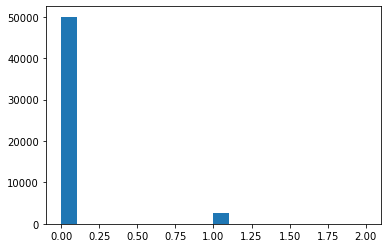

In [15]:
plt.hist(df['y'], bins=20, range=(0,2))
df['y'].value_counts()

In [16]:
# value research : x1_term

(array([10869.,  5968.,  4258.,  4620.,  5260.,  4650.,  2441.,  1992.,
         2043.,  1159.,  1355.,  1296.,  1368.,  1331.,  1287.,  1112.,
          774.,   438.,   252.,    27.]),
 array([  0. ,  13.5,  27. ,  40.5,  54. ,  67.5,  81. ,  94.5, 108. ,
        121.5, 135. , 148.5, 162. , 175.5, 189. , 202.5, 216. , 229.5,
        243. , 256.5, 270. ]),
 <BarContainer object of 20 artists>)

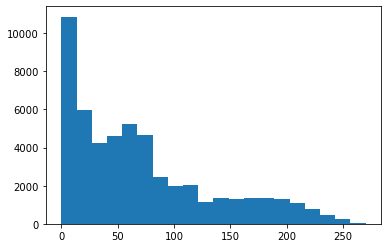

In [17]:
plt.hist(df['x1_term'], bins=20, range=(0,270))

In [18]:
bins = range(0,281,20)
term = pd.cut(df['x1_term'], bins).value_counts().sort_index()
display(term)

(0, 20]       12855
(20, 40]       6597
(40, 60]       7492
(60, 80]       7038
(80, 100]      3130
(100, 120]     3217
(120, 140]     1826
(140, 160]     2028
(160, 180]     1979
(180, 200]     1906
(200, 220]     1664
(220, 240]      792
(240, 260]      323
(260, 280]       10
Name: x1_term, dtype: int64

In [19]:
# 度数分布表
def create_frequency_table(col):
    freq = df[col].value_counts(sort=False) # 度数
    rel_freq = freq / df[col].count()  # 相対度数
    cum_freq = freq.cumsum()  # 累積度数
    rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

    dist = pd.DataFrame(
        {
            "度数": freq,
            "相対度数": rel_freq,
            "累積度数": cum_freq,
            "相対累積度数": rel_cum_freq,
        },
        index=freq.index
    )
    dist = dist.sort_values('度数', ascending=False)
    return dist

In [20]:
create_frequency_table('x1_term')

,度数,相対度数,累積度数,相対累積度数
0,1643,0.031295,1643,0.031295
1,980,0.018667,4022,0.076610
8,905,0.017238,17099,0.325695
10,858,0.016343,21209,0.403981
11,835,0.015905,23212,0.442133
...,...,...,...,...
263,2,0.000038,16194,0.308457
262,2,0.000038,14289,0.272171
268,1,0.000019,26220,0.499429
267,1,0.000019,24353,0.463867


In [21]:
# 度数分布(%)
terms = []
for v in term:
    terms.append(round(v/ df['x1_term'].value_counts().sum() *100))

print(terms)
    
list = []
i = 0
for vv in terms:
    list.append('{0} : {1}%'.format(i+20, vv))
    i=i+20
list

[24, 13, 14, 13, 6, 6, 3, 4, 4, 4, 3, 2, 1, 0]


['20 : 24%',
 '40 : 13%',
 '60 : 14%',
 '80 : 13%',
 '100 : 6%',
 '120 : 6%',
 '140 : 3%',
 '160 : 4%',
 '180 : 4%',
 '200 : 4%',
 '220 : 3%',
 '240 : 2%',
 '260 : 1%',
 '280 : 0%']

In [22]:
# value research : x2_sex

2     26453
1     25297
99      750
Name: x2_sex, dtype: int64

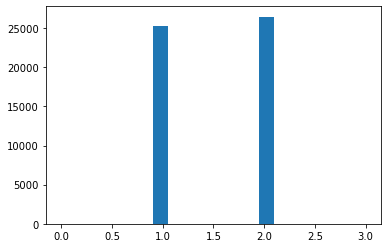

In [23]:
plt.hist(df['x2_sex'], bins=20, range=(0,3))
df['x2_sex'].value_counts()

(array([51750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   750.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

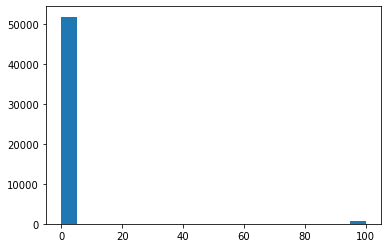

In [24]:
plt.hist(df['x2_sex'], bins=20, range=(0, 100))
# 99 : その他

In [25]:
# data processing

In [26]:
# compensate　missing values
# contain null column : x0_age, x10, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71

In [27]:
# value research : x0_age

In [28]:
df_proc = df.copy()

(array([1.480e+02, 1.980e+02, 4.110e+02, 2.605e+03, 7.553e+03, 8.216e+03,
        7.215e+03, 6.590e+03, 5.937e+03, 4.759e+03, 3.212e+03, 2.128e+03,
        1.339e+03, 9.020e+02, 2.930e+02, 1.550e+02, 6.500e+01, 2.100e+01,
        2.000e+00, 1.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

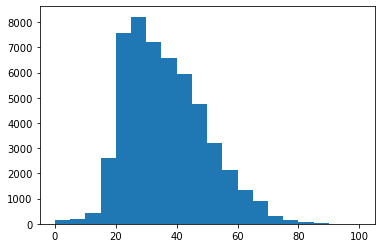

In [29]:
# histgram
plt.hist(df_proc['x0_age'], bins=20, range=(0,100))
# 'x0_age'の分布、偏りのある分布

In [30]:
# value counts
bins = range(0,81,10)
age = pd.cut(df_proc['x0_age'], bins).value_counts().sort_index()
display(age)

(0, 10]       387
(10, 20]     4192
(20, 30]    16028
(30, 40]    13523
(40, 50]    10183
(50, 60]     5006
(60, 70]     1960
(70, 80]      392
Name: x0_age, dtype: int64

In [31]:
# 度数分布表
create_frequency_table('x0_age')

,度数,相対度数,累積度数,相対累積度数
24.0,1735,0.033527,29199,0.564232
25.0,1726,0.033353,6014,0.116213
26.0,1724,0.033314,34634,0.669256
22.0,1634,0.031575,1634,0.031575
23.0,1621,0.031324,20686,0.399729
...,...,...,...,...
89.0,3,0.000058,30418,0.587787
92.0,1,0.000019,45140,0.872271
100.0,1,0.000019,12494,0.241430
88.0,1,0.000019,48852,0.944000


In [32]:
# 度数分布(%)
ages = []
for x in age:
    ages.append(round(x/ df_proc['x0_age'].value_counts().sum() *100))

list = []
i = 0
for xx in ages:
    list.append('{0}代:{1}%'.format(i*10, xx))
    i=i+1
list
# 1:20代, 2:30代, 3:40代

['0代:1%',
 '10代:8%',
 '20代:31%',
 '30代:26%',
 '40代:20%',
 '50代:10%',
 '60代:4%',
 '70代:1%']

In [33]:
df_proc['x0_age'].describe()

count    51750.000000
mean        35.915749
std         13.067311
min          0.000000
25%         26.000000
50%         34.000000
75%         44.000000
max        100.000000
Name: x0_age, dtype: float64

In [34]:
df_proc['x0_age'].median()

34.0

In [35]:
df_proc['x0_age'].mode()

0    24.0
dtype: float64

In [36]:
# mean=36, median=34, mode=24
# 補完に中央値を用いる

In [37]:
df_proc['x0_age'] = df_proc['x0_age'].fillna(df_proc['x0_age'].median())

In [38]:
# value research : x9

In [39]:
pd.set_option('display.max_rows', 500)
df_proc['x9'].value_counts()

T    22518
K     8506
C     6926
Q     4973
H     3050
N     2642
D     1907
S     1009
R      969
Name: x9, dtype: int64

In [40]:
# value research : x10

(array([0.0000e+00, 0.0000e+00, 2.3900e+02, 5.5290e+03, 1.2195e+04,
        8.6360e+03, 6.4930e+03, 5.4770e+03, 4.8270e+03, 3.6200e+03,
        2.1290e+03, 1.1700e+03, 7.3300e+02, 4.3600e+02, 1.7500e+02,
        9.8000e+01, 4.5000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

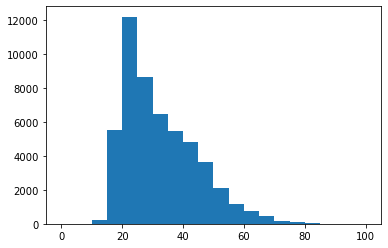

In [41]:
# histgram
plt.hist(df_proc['x10'], bins=20, range=(0,100))
# 'x10'の分布、偏りのある分布
# 年齢と相関がある？分布が似ている

In [42]:
# percentage
ages = []
for x in age:
    ages.append(round(x/ df_proc['x10'].value_counts().sum() *100))

list = []
i = 0
for xx in ages:
    list.append('{0}:{1}%'.format(i*10, xx))
    i=i+1
list
# 1:20, 2:30, 3:40
# 割合は'x0_age'と一致
# 'x0_age'同様、中央値で補完する

['0:1%', '10:8%', '20:31%', '30:26%', '40:20%', '50:10%', '60:4%', '70:1%']

In [43]:
df_proc['x10'] = df_proc['x10'].fillna(df_proc['x10'].median())

In [44]:
# value research : x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71 

In [45]:
df_hist = df_proc.copy()

In [310]:
# missing value(null) count and percentage
total = df_hist.isnull().sum().sort_values(ascending=False)
percent = (df_hist.isnull().sum()/df_hist.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(20)

,Total,Percent
x71,52460,0.999238
x70,52274,0.995695
x69,52274,0.995695
x68,52274,0.995695
x67,52274,0.995695
x62,52119,0.992743
x59,51732,0.985371
x60,51732,0.985371
x61,51732,0.985371
x58,51732,0.985371


In [314]:
percent = (df_hist.isnull().sum()/df_hist.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(20).sort_index()

,Total,Percent
x16,0,0.000000
x17,0,0.000000
x18,0,0.000000
x19,0,0.000000
x20,0,0.000000
x21,0,0.000000
x58,51732,0.985371
x59,51732,0.985371
x60,51732,0.985371
x61,51732,0.985371


In [46]:
# null count
print('x58, null : {0}, values : {1}'.format(df_hist['x58'].isnull().sum(), (len(df_hist['x58']) - df_hist['x58'].isnull().sum())))
print('x59, null : {0}, values : {1}'.format(df_hist['x59'].isnull().sum(), (len(df_hist['x59']) - df_hist['x59'].isnull().sum())))
print('x60, null : {0}, values : {1}'.format(df_hist['x60'].isnull().sum(), (len(df_hist['x60']) - df_hist['x60'].isnull().sum())))
print('x61, null : {0}, values : {1}'.format(df_hist['x61'].isnull().sum(), (len(df_hist['x61']) - df_hist['x61'].isnull().sum())))
print('x62, null : {0}, values : {1}'.format(df_hist['x62'].isnull().sum(), (len(df_hist['x62']) - df_hist['x62'].isnull().sum())))
print('x63, null : {0}, values : {1}'.format(df_hist['x63'].isnull().sum(), (len(df_hist['x63']) - df_hist['x63'].isnull().sum())))
print('x64, null : {0}, values : {1}'.format(df_hist['x64'].isnull().sum(), (len(df_hist['x64']) - df_hist['x64'].isnull().sum())))
print('x65, null : {0}, values : {1}'.format(df_hist['x65'].isnull().sum(), (len(df_hist['x65']) - df_hist['x65'].isnull().sum())))
print('x66, null : {0}, values : {1}'.format(df_hist['x66'].isnull().sum(), (len(df_hist['x66']) - df_hist['x66'].isnull().sum())))
print('x67, null : {0}, values : {1}'.format(df_hist['x67'].isnull().sum(), (len(df_hist['x67']) - df_hist['x67'].isnull().sum())))
print('x68, null : {0}, values : {1}'.format(df_hist['x68'].isnull().sum(), (len(df_hist['x68']) - df_hist['x68'].isnull().sum())))
print('x69, null : {0}, values : {1}'.format(df_hist['x69'].isnull().sum(), (len(df_hist['x69']) - df_hist['x69'].isnull().sum())))
print('x70, null : {0}, values : {1}'.format(df_hist['x70'].isnull().sum(), (len(df_hist['x70']) - df_hist['x70'].isnull().sum())))
print('x71, null : {0}, values : {1}'.format(df_hist['x71'].isnull().sum(), (len(df_hist['x71']) - df_hist['x71'].isnull().sum()))) # 欠損値が多い（99.9%）。欠損の意味が不明。重要度が低ければ除外する

# x58, x59, x61, x62, x64, x65, x66, x67 / null:51732
# x63 / null:52119
# x67, x68, x69, X70 / null:52274
# x71  / null:52460

# 欠損値の意味が不明？　中央値・最頻値、それぞれどちらが重要となる？
# 欠損値に意味がある？未回収者に関わる情報？回収済の場合はnull？
# 欠損が多すぎる？

x58, null : 51732, values : 768
x59, null : 51732, values : 768
x60, null : 51732, values : 768
x61, null : 51732, values : 768
x62, null : 52119, values : 381
x63, null : 51732, values : 768
x64, null : 51732, values : 768
x65, null : 51732, values : 768
x66, null : 51732, values : 768
x67, null : 52274, values : 226
x68, null : 52274, values : 226
x69, null : 52274, values : 226
x70, null : 52274, values : 226
x71, null : 52460, values : 40


count    768.000000
mean       2.639323
std        3.165799
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       54.000000
Name: x58, dtype: float64


(array([523., 160.,  52.,  17.,  12.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

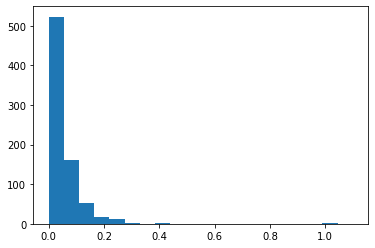

In [72]:
# histgram
print(df_proc['x58'].describe())
print("="*50)
# plt.hist(df_hist['x58'], bins=20, range=(0,60))
# print("="*50)
df_hist['x58'] = df_hist['x58']/df_hist['x58'].max()
plt.hist(df_hist['x58'], bins=20, range=(0,1.1))

In [64]:
df_proc['x58'].value_counts()
# 他の値で補完する。入力値に影響を与えない値で補完したい。
# 近い値だと影響が出てしまう？例えば[-1]
# 欠損値を補完する値は[?]にしてみる。

1.0     387
2.0     136
3.0      78
4.0      54
5.0      28
6.0      21
7.0      18
8.0      13
9.0       9
13.0      8
10.0      5
12.0      4
11.0      3
15.0      2
22.0      1
54.0      1
Name: x58, dtype: int64

count      768.000000
mean     14595.561198
std      16842.294721
min        500.000000
25%       3000.000000
50%       7600.000000
75%      20000.000000
max      90000.000000
Name: x59, dtype: float64


(array([243., 186., 108.,  22.,  42.,  23.,  42.,  17.,  13.,  17.,  21.,
         11.,  13.,   0.,   3.,   3.,   2.,   0.,   2.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

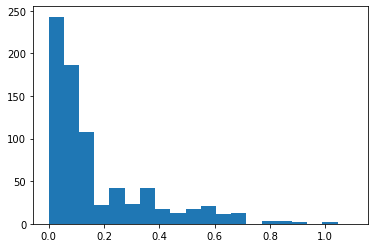

In [71]:
print(df_proc['x59'].describe())
print("="*50)
# plt.hist(df_hist['x59'], bins=20, range=(0,90000))
# print("="*50)
df_hist['x59'] = df_hist['x59']/df_hist['x59'].max()
plt.hist(df_hist['x59'], bins=20, range=(0,1.1))

In [65]:
df_proc['x59'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

5000.0     109
10000.0     87
3000.0      83
1000.0      49
30000.0     33
20000.0     29
4000.0      28
50000.0     19
2000.0      18
8000.0      16
500.0       15
9000.0      12
15000.0     10
6000.0      10
60000.0      9
7000.0       8
2500.0       8
1500.0       7
35000.0      6
4500.0       6
2600.0       6
28000.0      5
12000.0      5
25000.0      5
9600.0       5
40000.0      5
48000.0      5
45000.0      5
11000.0      4
36000.0      4
8500.0       4
22000.0      4
6500.0       4
4600.0       3
70000.0      3
2400.0       3
42000.0      3
24000.0      3
3500.0       3
27000.0      3
39000.0      3
34000.0      3
31000.0      3
13000.0      3
56000.0      3
7500.0       3
90000.0      2
59500.0      2
80000.0      2
46000.0      2
41000.0      2
1400.0       2
14000.0      2
4800.0       2
19600.0      2
49000.0      2
48400.0      2
23000.0      2
30300.0      2
29400.0      2
900.0        2
16000.0      2
78000.0      2
2300.0       2
39600.0      2
55000.0      2
29200.0   

count      768.000000
mean      7972.395833
std       9261.323792
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      78000.000000
Name: x60, dtype: float64


(array([294., 189., 199.,   9.,  32.,   5.,  19.,   1.,   2.,   4.,   0.,
          8.,   0.,   5.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

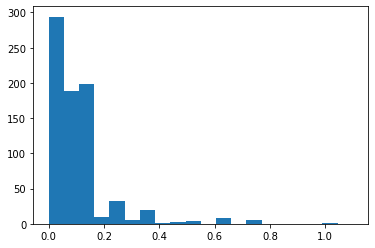

In [70]:
# histgram
print(df_proc['x60'].describe())
print("="*50)
# plt.hist(df_hist['x60'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x60'] = df_hist['x60']/df_hist['x60'].max()
plt.hist(df_hist['x60'], bins=20, range=(0,1.1))

In [66]:
df_proc['x60'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    191
5000.0     153
3000.0     125
1000.0      77
20000.0     24
4000.0      21
2000.0      20
500.0       16
30000.0     15
8000.0       8
50000.0      7
6000.0       7
1500.0       6
2500.0       5
1400.0       5
2600.0       5
4600.0       4
9000.0       4
7000.0       3
15000.0      3
9600.0       3
17000.0      3
2300.0       3
40000.0      3
4800.0       3
6400.0       2
1600.0       2
13000.0      2
25000.0      2
19000.0      2
21000.0      2
2400.0       2
900.0        2
29400.0      2
35000.0      2
4500.0       2
19100.0      1
3800.0       1
24000.0      1
5200.0       1
1300.0       1
33000.0      1
2800.0       1
8300.0       1
9300.0       1
6800.0       1
49000.0      1
58000.0      1
4300.0       1
58900.0      1
78000.0      1
29000.0      1
19700.0      1
4400.0       1
19600.0      1
21600.0      1
6500.0       1
59500.0      1
3500.0       1
16000.0      1
3700.0       1
17300.0      1
22000.0      1
60000.0      1
27500.0      1
59000.0      1
39600.0   

count      768.000000
mean      5243.998698
std       7576.654197
min        191.000000
25%       1000.000000
50%       3000.000000
75%       5000.000000
max      78000.000000
Name: x61, dtype: float64


(array([443., 162., 130.,   1.,   9.,   2.,  11.,   0.,   0.,   1.,   0.,
          4.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

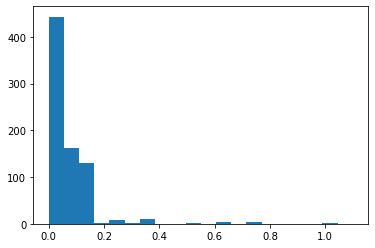

In [68]:
print(df_proc['x61'].describe())
print("="*50)
# plt.hist(df_hist['x61'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x61'] = df_hist['x61']/df_hist['x61'].max()
plt.hist(df_hist['x61'], bins=20, range=(0,1.1))

In [67]:
df_proc['x61'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

1000.0     152
5000.0     141
10000.0    121
3000.0     113
500.0       79
2000.0      35
4000.0      28
30000.0      8
1500.0       8
20000.0      7
6000.0       5
2600.0       5
8000.0       4
9600.0       4
4600.0       4
2500.0       4
9000.0       4
50000.0      3
900.0        3
7000.0       2
29400.0      2
4800.0       2
1400.0       2
2400.0       2
2300.0       2
1600.0       2
1800.0       1
4500.0       1
9300.0       1
19100.0      1
58000.0      1
3900.0       1
29100.0      1
4300.0       1
58900.0      1
59500.0      1
59000.0      1
3700.0       1
3500.0       1
78000.0      1
15000.0      1
19600.0      1
3600.0       1
4400.0       1
39600.0      1
22000.0      1
700.0        1
24000.0      1
1200.0       1
191.0        1
49000.0      1
7700.0       1
Name: x61, dtype: int64

count      381.000000
mean      2864.511639
std       4429.073467
min          0.000000
25%        346.410162
50%       1414.213562
75%       3427.827300
max      31754.264805
Name: x62, dtype: float64


(array([211.,  77.,  42.,   9.,  16.,  11.,   4.,   0.,   1.,   0.,   1.,
          1.,   3.,   1.,   1.,   0.,   1.,   1.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

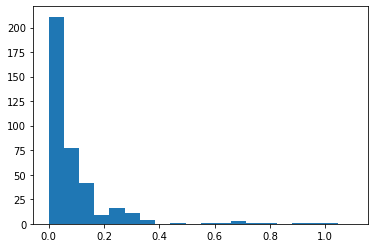

In [73]:
print(df_proc['x62'].describe())
print("="*50)
# plt.hist(df_hist['x62'], bins=20, range=(0,32000))
# print("="*50)
df_hist['x62'] = df_hist['x62']/df_hist['x62'].max()
plt.hist(df_hist['x62'], bins=20, range=(0,1.1))
# min=0, 0に意味がありそう

In [74]:
df_proc['x62'].value_counts()
# 欠損値は0で補完しない。0:79件の意味が変わってしまうため。
# 欠損値を補完する値は[-1]にしてみる。

0.000000        79
1414.213562     23
707.106781      13
2886.751346      9
1154.700538      9
353.553391       8
2500.000000      5
282.842712       4
3535.533906      4
577.350269       4
7071.067812      3
288.675135       3
2474.873734      3
1322.875656      3
2738.612788      3
3224.903099      3
3559.026084      3
5773.502692      3
11547.005384     3
1000.000000      3
4358.898944      2
9899.494937      2
2828.427125      2
1190.238071      2
1060.660172      2
3915.780041      2
8485.281374      2
2000.000000      2
2309.401077      2
1250.000000      2
21213.203436     2
500.000000       2
1527.525232      2
8660.254038      2
8864.052604      1
2254.624876      1
1697.056275      1
2108.185107      1
1289.820283      1
3313.931631      1
2096.624271      1
12020.815280     1
2968.084199      1
7762.087348      1
8906.926144      1
680.685929       1
417.261480       1
1272.792206      1
258.774585       1
7874.007874      1
3119.294792      1
786.795792       1
1443.375673 

count    7.680000e+02
mean     8.205164e+05
std      8.230016e+05
min      5.400000e+01
25%      6.440150e+04
50%      5.051900e+05
75%      1.532342e+06
max      2.676106e+06
Name: x63, dtype: float64


(array([  0., 178., 116.,  53.,  44.,  31.,  34.,  31.,  25.,  24.,  32.,
         36.,  43.,  27.,  24.,  22.,  18.,  18.,  12.,   0.]),
 array([-0.1 , -0.04,  0.02,  0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,
         0.44,  0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,
         0.98,  1.04,  1.1 ]),
 <BarContainer object of 20 artists>)

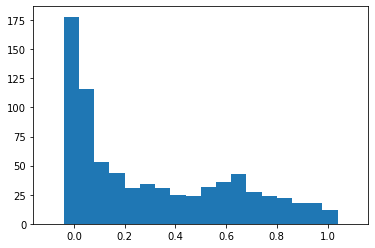

In [76]:
print(df_proc['x63'].describe())
print("="*50)
# plt.hist(df_hist['x63'], bins=20, range=(0,330000))
# print("="*50)
df_hist['x63'] = df_hist['x63']/df_hist['x63'].max()
plt.hist(df_hist['x63'], bins=20, range=(-0.1,1.1))

In [77]:
df_proc['x63'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

28680.0      2
65535.0      1
464.0        1
117304.0     1
234607.0     1
            ..
187.0        1
1395670.0    1
6987.0       1
174395.0     1
240.0        1
Name: x63, Length: 767, dtype: int64

count    7.680000e+02
mean     1.247370e+06
std      8.961457e+05
min     -8.410600e+04
25%      4.644518e+05
50%      1.094285e+06
75%      2.168428e+06
max      3.220710e+06
Name: x64, dtype: float64


(array([  0.,  71.,  58.,  61.,  61.,  59.,  52.,  48.,  46.,  42.,  25.,
         22.,  37.,  32., 119.,  34.,   0.,   0.,   1.,   0.]),
 array([-0.1 , -0.04,  0.02,  0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,
         0.44,  0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,
         0.98,  1.04,  1.1 ]),
 <BarContainer object of 20 artists>)

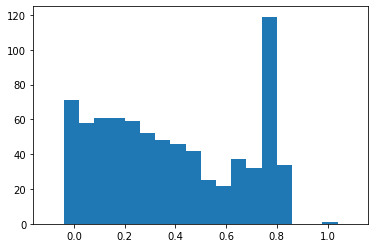

In [78]:
print(df_proc['x64'].describe())
print("="*50)
# plt.hist(df_hist['x64'], bins=20, range=(0,330000))
# print("="*50)
df_hist['x64'] = df_hist['x64']/df_hist['x64'].max()
plt.hist(df_hist['x64'], bins=20, range=(-0.1,1.1))

In [108]:
s = []
s = df_hist['x64'][df_hist['x64'] == 0]
print(s.shape)
print(df_proc['x64'].value_counts())
print(df_proc['x64'].median())
print(df_proc['x64'].max())
# マイナスの値を含む。0は存在しないが、他の値と明確に区別できる値で補完する。「99999999」とする。
# 欠損値を補完する値は[0]にしてみる。

(0,)
1572664.0    1
2096815.0    1
2456783.0    1
2014574.0    1
372570.0     1
            ..
569438.0     1
514045.0     1
1269559.0    1
634572.0     1
106496.0     1
Name: x64, Length: 768, dtype: int64
1094285.0
3220710.0


count      768.000000
mean      5854.557292
std       7996.818472
min        500.000000
25%       1000.000000
50%       4000.000000
75%       7775.000000
max      78000.000000
Name: x65, dtype: float64


(array([405., 175., 143.,   5.,  13.,   3.,  11.,   0.,   1.,   2.,   0.,
          5.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

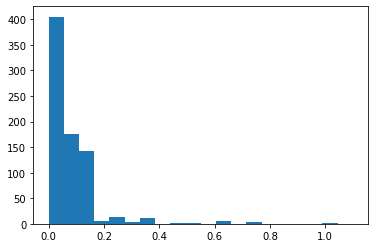

In [82]:
print(df_proc['x65'].describe())
print("="*50)
# plt.hist(df_hist['x65'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x65'] = df_hist['x65']/df_hist['x65'].max()
plt.hist(df_hist['x65'], bins=20, range=(0,1.1))

In [83]:
df_proc['x65'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

5000.0     145
1000.0     135
10000.0    131
3000.0     109
500.0       55
2000.0      36
4000.0      26
20000.0     11
30000.0      8
2500.0       7
1500.0       7
6000.0       6
2600.0       5
50000.0      4
9600.0       4
8000.0       4
4600.0       4
9000.0       4
17000.0      3
1600.0       3
7000.0       3
700.0        3
4800.0       3
1400.0       3
6400.0       2
2400.0       2
3600.0       2
1200.0       2
900.0        2
2300.0       2
29400.0      2
29100.0      1
1700.0       1
9500.0       1
3900.0       1
39600.0      1
24000.0      1
1300.0       1
58000.0      1
5200.0       1
40000.0      1
9300.0       1
4500.0       1
49000.0      1
4700.0       1
12500.0      1
19100.0      1
58900.0      1
2800.0       1
4400.0       1
19600.0      1
5400.0       1
35000.0      1
15000.0      1
21600.0      1
59500.0      1
78000.0      1
9400.0       1
3500.0       1
6900.0       1
3700.0       1
22000.0      1
59000.0      1
4300.0       1
16000.0      1
7700.0       1
Name: x65,

count      768.000000
mean      6876.811198
std       8413.262309
min        191.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      78000.000000
Name: x66, dtype: float64


(array([344., 185., 179.,   4.,  22.,   4.,  15.,   1.,   0.,   3.,   0.,
          6.,   0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

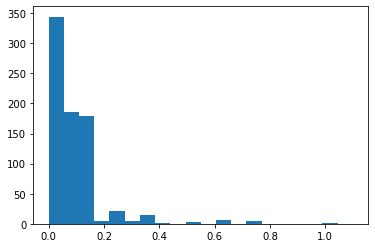

In [84]:
# histgram
print(df_proc['x66'].describe())
print("="*50)
# plt.hist(df_hist['x66'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x66'] = df_hist['x66']/df_hist['x66'].max()
plt.hist(df_hist['x66'], bins=20, range=(0,1.1))

In [85]:
df_proc['x66'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    172
5000.0     156
3000.0     138
1000.0     103
4000.0      25
500.0       25
2000.0      22
20000.0     17
30000.0     11
8000.0       7
6000.0       6
2600.0       5
2500.0       5
50000.0      5
1500.0       5
15000.0      3
4600.0       3
9000.0       3
9600.0       3
1400.0       3
2300.0       3
40000.0      2
29400.0      2
25000.0      2
4800.0       2
4500.0       2
2400.0       2
900.0        2
19100.0      1
5300.0       1
5200.0       1
19000.0      1
21000.0      1
8400.0       1
58000.0      1
8300.0       1
9300.0       1
33000.0      1
58900.0      1
1600.0       1
4300.0       1
59000.0      1
49000.0      1
191.0        1
600.0        1
24000.0      1
700.0        1
22000.0      1
13000.0      1
29000.0      1
6500.0       1
3500.0       1
39600.0      1
4400.0       1
19600.0      1
59500.0      1
78000.0      1
7000.0       1
3700.0       1
17300.0      1
27500.0      1
7700.0       1
Name: x66, dtype: int64

count    226.000000
mean       1.300885
std        0.852551
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: x67, dtype: float64


(array([  0.,   0., 186.,   0.,  24.,   0.,  12.,   0.,   0.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

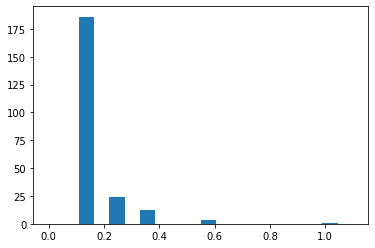

In [86]:
# histgram
print(df_proc['x67'].describe())
print("="*50)
# plt.hist(df_hist['x67'], bins=20, range=(0,9))
# print("="*50)
df_hist['x67'] = df_hist['x67']/df_hist['x67'].max()
plt.hist(df_hist['x67'], bins=20, range=(0,1.1))

In [87]:
df_proc['x67'].value_counts()
# 欠損値を補完する値は[99]にしてみる。区別するために、「0」ではなく、離した値で補完してみる。

1.0    186
2.0     24
3.0     12
5.0      3
9.0      1
Name: x67, dtype: int64

count      226.000000
mean     12192.035398
std      14638.063877
min        500.000000
25%       3000.000000
50%       6600.000000
75%      10000.000000
max      90000.000000
Name: x68, dtype: float64


(array([80., 46., 48.,  4., 13.,  5., 11.,  1.,  3.,  1.,  8.,  4.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

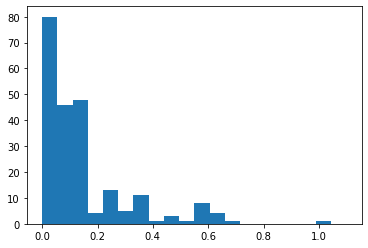

In [88]:
# histgram
print(df_proc['x68'].describe())
print("="*50)
# plt.hist(df_hist['x68'], bins=20, range=(0,90000))
# print("="*50)
df_hist['x68'] = df_hist['x68']/df_hist['x68'].max()
plt.hist(df_hist['x68'], bins=20, range=(0,1.1))

In [89]:
df_proc['x68'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    46
3000.0     36
5000.0     29
1000.0     21
20000.0    11
30000.0    10
8000.0      8
50000.0     8
2000.0      4
6000.0      3
4000.0      3
500.0       3
25000.0     2
29400.0     2
4800.0      2
40000.0     2
2600.0      2
13000.0     2
2500.0      2
58000.0     1
8400.0      1
21000.0     1
1500.0      1
17000.0     1
19100.0     1
6200.0      1
8300.0      1
4500.0      1
33000.0     1
2400.0      1
58900.0     1
90000.0     1
4300.0      1
7000.0      1
49000.0     1
40500.0     1
24000.0     1
4200.0      1
9000.0      1
9600.0      1
39600.0     1
59100.0     1
4400.0      1
19600.0     1
15000.0     1
59500.0     1
4600.0      1
29600.0     1
56000.0     1
Name: x68, dtype: int64

count      226.000000
mean     10245.575221
std      11959.479843
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      59500.000000
Name: x69, dtype: float64


(array([74., 48.,  6., 58.,  1.,  2., 10.,  3.,  2.,  8.,  2.,  0.,  3.,
         0.,  1.,  5.,  0.,  2.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

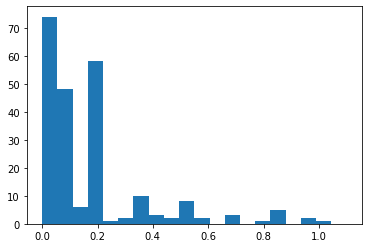

In [90]:
# histgram
print(df_proc['x69'].describe())
print("="*50)
# plt.hist(df_hist['x69'], bins=20, range=(0,60000))
# print("="*50)
df_hist['x69'] = df_hist['x69']/df_hist['x69'].max()
plt.hist(df_hist['x69'], bins=20, range=(0,1.1))

In [91]:
df_proc['x69'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    58
3000.0     40
5000.0     36
1000.0     25
20000.0     8
30000.0     8
8000.0      5
50000.0     5
6000.0      3
500.0       3
29400.0     2
2000.0      2
4800.0      2
40000.0     2
25000.0     2
2600.0      1
5200.0      1
21000.0     1
19100.0     1
1500.0      1
8300.0      1
2400.0      1
33000.0     1
58900.0     1
58000.0     1
4600.0      1
4300.0      1
4000.0      1
1600.0      1
49000.0     1
15000.0     1
35000.0     1
19600.0     1
4400.0      1
19700.0     1
39600.0     1
4500.0      1
3800.0      1
24000.0     1
59500.0     1
Name: x69, dtype: int64

count      226.000000
mean      9327.876106
std      11369.134508
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      59500.000000
Name: x70, dtype: float64


(array([85., 43.,  6., 58.,  1.,  2.,  8.,  3.,  3.,  6.,  1.,  0.,  2.,
         0.,  1.,  4.,  0.,  2.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

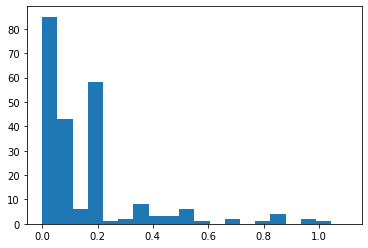

In [92]:
# histgram
print(df_proc['x70'].describe())
print("="*50)
# plt.hist(df_hist['x70'], bins=20, range=(0,60000))
# print("="*50)
df_hist['x70'] = df_hist['x70']/df_hist['x70'].max()
plt.hist(df_hist['x70'], bins=20, range=(0,1.1))

In [93]:
df_proc['x70'].value_counts()
# 欠損値を補完する値は[0]にしてみる。

10000.0    58
3000.0     41
1000.0     32
5000.0     31
20000.0     7
30000.0     6
500.0       6
8000.0      5
50000.0     4
6000.0      4
2000.0      3
4800.0      2
29400.0     2
25000.0     2
4600.0      2
15000.0     1
19100.0     1
33000.0     1
8300.0      1
24000.0     1
2600.0      1
58000.0     1
4500.0      1
29100.0     1
21000.0     1
1200.0      1
19600.0     1
2400.0      1
58900.0     1
39600.0     1
4300.0      1
4400.0      1
4000.0      1
49000.0     1
59500.0     1
40000.0     1
Name: x70, dtype: int64

count       40.000000
mean      3339.688069
std       6667.264737
min          0.000000
25%          0.000000
50%        895.548321
75%       2453.738644
max      31112.698372
Name: x71, dtype: float64


(array([28.,  4.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([0.   , 0.055, 0.11 , 0.165, 0.22 , 0.275, 0.33 , 0.385, 0.44 ,
        0.495, 0.55 , 0.605, 0.66 , 0.715, 0.77 , 0.825, 0.88 , 0.935,
        0.99 , 1.045, 1.1  ]),
 <BarContainer object of 20 artists>)

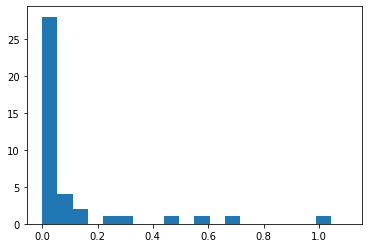

In [94]:
# histgram
print(df_proc['x71'].describe())
print("="*50)
# plt.hist(df_hist['x71'], bins=20, range=(0,32000))
# print("="*50)
df_hist['x71'] = df_hist['x71']/df_hist['x71'].max()
plt.hist(df_hist['x71'], bins=20, range=(0,1.1))

In [95]:
df_proc['x71'].value_counts()
# 欠損値を補完する値は[-1]にしてみる。

0.000000        14
1414.213562      5
353.553391       2
2309.401077      1
282.842712       1
1562.049935      1
31112.698372     1
4949.747468      1
21213.203436     1
1272.792206      1
14142.135624     1
2886.751346      1
4041.451884      1
18754.999334     1
2969.848481      1
2000.000000      1
636.396103       1
424.264069       1
288.675135       1
7071.067812      1
1154.700538      1
8736.322644      1
Name: x71, dtype: int64

In [61]:
# similar distribution
# x58, x62, X71
# x59, x68, x67
# x60, x61, x65, x66
# x63, x64 float
# x69, x70

In [62]:
# 欠損値の意味は不明
# 最頻値の割合が多い、最頻値で補完　？　NULLの意味は？

In [96]:
print('x58') # 最頻値、中央値、同じため、代表値：1 とする
print(df_proc['x58'].mode()) # same
print(df_proc['x58'].median())
print("="*50)

print('x59')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x59'].mode())
print('mode : {0}'.format(round(df_proc['x59'].value_counts()[df_proc['x59'].mode()]/df_proc['x59'].count()*100,1)))
print(df_proc['x59'].median())
print("="*50)

print('x60')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x60'].mode())
print('mode : {0}'.format(round(df_proc['x60'].value_counts()[df_proc['x60'].mode()]/df_proc['x60'].count()*100,1)))
print(df_proc['x60'].median())
print("="*50)

print('x61')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x61'].mode())
print('mode : {0}'.format(round(df_proc['x61'].value_counts()[df_proc['x61'].mode()]/df_proc['x61'].count()*100,1)))
print(df_proc['x61'].median())
print("="*50)

print('x62')
#　0が最頻値(20.7%)。0に意味があると思われる。未入力（欠損）にも意味があると思われる。欠損値とわかるよう、最低値が0、区別するため代表値： -1とする
print(df_proc['x62'].mode())
print('mode : {0}'.format(round(df_proc['x62'].value_counts()[df_proc['x62'].mode()]/df_proc['x62'].count()*100,1)))
print(df_proc['x62'].median())
print("="*50)

print('x63')
# 外れ値あり。最頻値が他より圧倒的に多い。代表値： 最頻値とする
print(df_proc['x63'].mode())
print('mode : {0}'.format(round(df_proc['x63'].value_counts()[df_proc['x63'].mode()]/df_proc['x63'].count()*100,1)))
print(df_proc['x63'].median())
print("="*50)

print('x64')
# contain minus values
# マイナスにも触れている。損益金？マイナス値にも意味があるため、正負を考慮したい。外れ値があり、正規分布でないため、中央値を使用することとする。
print(df_proc['x64'].mode()) 
print('mode : {0}'.format(round(df_proc['x64'].value_counts()[df_proc['x64'].mode()]/df_proc['x64'].count()*100,1)))
print(df_proc['x64'].median())
print("="*50)

print('x65')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x65'].mode()) # near
print('mode : {0}'.format(round(df_proc['x65'].value_counts()[df_proc['x65'].mode()]/df_proc['x65'].count()*100,1)))
print(df_proc['x65'].median())
print("="*50)

print('x66')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x66'].mode())
print('mode : {0}'.format(round(df_proc['x66'].value_counts()[df_proc['x66'].mode()]/df_proc['x66'].count()*100,1)))
print(df_proc['x66'].median())
print("="*50)

print('x67') # 最頻値、中央値、同じため、代表値：1 とする
print(df_proc['x67'].mode()) # same
print(df_proc['x67'].median())
print("="*50)

print('x68')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x68'].mode())
print('mode : {0}'.format(round(df_proc['x68'].value_counts()[df_proc['x68'].mode()]/df_proc['x68'].count()*100,1)))
print(df_proc['x68'].median())
print("="*50)

print('x69')
# x70と同じ分布。相関あり。
# 山が２つある。その為、平均値・中央値の使用は避けたい。一番大きな山（最頻値：25.7%)　代表値： 最頻値とする
print(df_proc['x69'].mode())
print('mode : {0}'.format(round(df_proc['x69'].value_counts()[df_proc['x69'].mode()]/df_proc['x69'].count()*100,1)))
print(df_proc['x69'].median())
print("="*50)

print('x70')
# x69と同じ分布。相関あり。
# 山が２つある。その為、平均値・中央値の使用は避けたい。一番大きな山（最頻値：25.7%)　代表値： 最頻値とする
print(df_proc['x70'].mode())
print('mode : {0}'.format(round(df_proc['x70'].value_counts()[df_proc['x70'].mode()]/df_proc['x70'].count()*100,1)))
print(df_proc['x70'].median())
print("="*50)

print('x71')
#　0が最頻値(35%)。0に意味があると思われる。未入力（欠損）にも意味があると思われる。欠損値とわかるよう、最低値が0、区別するため代表値： -1とする
print(df_proc['x71'].mode())
print('mode : {0}'.format(round(df_proc['x71'].value_counts()[df_proc['x71'].mode()]/df_proc['x71'].count()*100,1)))
print(df_proc['x71'].median())

x58
0    1.0
dtype: float64
1.0
x59
0    5000.0
dtype: float64
mode : 5000.0    14.2
Name: x59, dtype: float64
7600.0
x60
0    10000.0
dtype: float64
mode : 10000.0    24.9
Name: x60, dtype: float64
5000.0
x61
0    1000.0
dtype: float64
mode : 1000.0    19.8
Name: x61, dtype: float64
3000.0
x62
0    0.0
dtype: float64
mode : 0.0    20.7
Name: x62, dtype: float64
1414.2135623730999
x63
0    28680.0
dtype: float64
mode : 28680.0    0.3
Name: x63, dtype: float64
505190.0
x64
0       -84106.0
1       -83614.0
2       -82201.0
3       -81403.0
4       -76568.0
         ...    
763    2591813.0
764    2591815.0
765    2591822.0
766    2591946.0
767    3220710.0
Length: 768, dtype: float64
mode : -84106.0      0.1
-83614.0      0.1
-82201.0      0.1
-81403.0      0.1
-76568.0      0.1
             ... 
 2591813.0    0.1
 2591815.0    0.1
 2591822.0    0.1
 2591946.0    0.1
 3220710.0    0.1
Name: x64, Length: 768, dtype: float64
1094285.0
x65
0    5000.0
dtype: float64
mode : 5000.0    18.9
N

In [ ]:
# そもそも欠損値が多すぎる（50000以上）のため、中央値、最頻値等で補完すべきではない？欠損値とわかる値で補完した方がよい？

In [65]:
# # complement missing values
# df_proc['x58'] = df_proc['x58'].fillna(1)
# df_proc['x59'] = df_proc['x59'].fillna(df_proc['x59'].median())
# df_proc['x60'] = df_proc['x60'].fillna(df_proc['x60'].median())
# df_proc['x61'] = df_proc['x61'].fillna(df_proc['x61'].median())
# df_proc['x62'] = df_proc['x62'].fillna(-1)
# # df_proc['x63'] = df_proc['x63'].fillna(df_proc['x63'].mode()) # 最頻値が0
# df_proc['x64'] = df_proc['x64'].fillna(df_proc['x64'].median())
# df_proc['x65'] = df_proc['x65'].fillna(df_proc['x65'].median())
# df_proc['x66'] = df_proc['x66'].fillna(df_proc['x66'].median())
# df_proc['x67'] = df_proc['x67'].fillna(1)
# df_proc['x68'] = df_proc['x68'].fillna(df_proc['x68'].median())
# # df_proc['x69'] = df_proc['x69'].fillna(df_proc['x69'].mode()) # 最頻値が0
# # df_proc['x70'] = df_proc['x70'].fillna(df_proc['x70'].mode()) # 最頻値が0
# df_proc['x71'] = df_proc['x71'].fillna(-1) # 欠損が99.9%のため、重要度が低ければ除外して再学習させる。

In [110]:
# 58:0
# 59:0
# 60:0
# 61:0
# 62:-1
# 63:0
# 64:99999999
# 65:0
# 66:0
# 67:99
# 68:0
# 69:0
# 70:0
# 71:-1
df_proc['x58'] = df_proc['x58'].fillna(0)
df_proc['x59'] = df_proc['x59'].fillna(0)
df_proc['x60'] = df_proc['x60'].fillna(0)
df_proc['x61'] = df_proc['x61'].fillna(0)
df_proc['x62'] = df_proc['x62'].fillna(-1)
df_proc['x63'] = df_proc['x63'].fillna(0)
df_proc['x64'] = df_proc['x64'].fillna(99999999)
df_proc['x65'] = df_proc['x65'].fillna(0)
df_proc['x66'] = df_proc['x66'].fillna(0)
df_proc['x67'] = df_proc['x67'].fillna(99)
df_proc['x68'] = df_proc['x68'].fillna(0)
df_proc['x69'] = df_proc['x69'].fillna(0)
df_proc['x70'] = df_proc['x70'].fillna(0)
df_proc['x71'] = df_proc['x71'].fillna(-1)

In [66]:
# unresolved
# 欠損のパターンの確認（MCAR、MAR、MNAR）、パターン別の対応
# 欠損に対する処理(リストワイズ法、ペアワイズ方、平均代入法、回帰代入法)　※用途、方法の検討

In [67]:
# unsolved!!!!!!! : dealing with outliers
# 発生原因はなにか？
# 外れ値に意味がある（有益）のか
# 各外れ値、それぞれどう扱うか（考慮要/不要の検討）
# 重要な外れ値か、異常値か（入力ミス・処理ミス（原因が明確）、どの程度逸脱したものを異常値とみなすか）
# 本当に外れ値か（外れ値検定）、スミルノフ=グラブス検定、IQR、クラスター分析 ←除外は厳に慎むべき？
# 生データから散布図を作成し、箱ひげ図により、外れ値の有無を確かめる
# 除外、そのまま、補完？
# データの入力がそもそも誤りである、値そのものは正しいが、偶然に外れ値が生じてしまった
# 正しい値（妥当性のある値）に修正、　行ごと削除、そのまま
# 外れ値と欠損値に関係があるか

In [68]:
# 外れ値→相関→欠損値

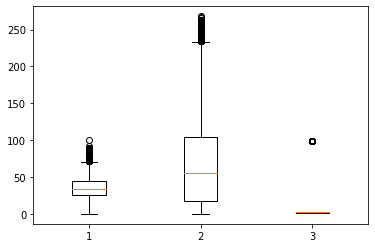

In [111]:
dfs = df_proc.copy()
fig, ax = plt.subplots()
ax.boxplot((dfs['x0_age'],dfs['x1_term'],dfs['x2_sex']))
plt.show()

In [112]:
print(dfs['x0_age'].value_counts()) # 100.0 御長寿（90歳以上が4名、80歳以上が9名）
print(dfs['x1_term'].value_counts()) # 268 割合は少ないが、長期契約も一定数いる。
print(dfs['x2_sex'].value_counts()) # 99 意味ありそう

34.0     2141
24.0     1735
25.0     1726
26.0     1724
22.0     1634
23.0     1621
27.0     1604
28.0     1592
29.0     1570
30.0     1479
31.0     1466
32.0     1452
33.0     1427
36.0     1386
35.0     1351
21.0     1343
37.0     1318
38.0     1296
41.0     1253
39.0     1239
42.0     1233
20.0     1220
40.0     1197
43.0     1170
45.0     1093
44.0     1084
46.0      995
47.0      961
19.0      941
48.0      866
49.0      844
51.0      778
50.0      684
52.0      634
18.0      631
53.0      589
55.0      533
54.0      527
56.0      467
57.0      431
17.0      423
16.0      382
58.0      374
60.0      350
59.0      323
61.0      312
62.0      254
15.0      228
63.0      221
66.0      213
65.0      213
64.0      202
67.0      181
68.0      180
14.0      160
69.0      115
13.0      112
70.0       69
72.0       68
12.0       65
73.0       56
74.0       50
71.0       50
4.0        49
10.0       44
75.0       44
9.0        43
7.0        42
8.0        39
3.0        39
6.0        38
2.0   

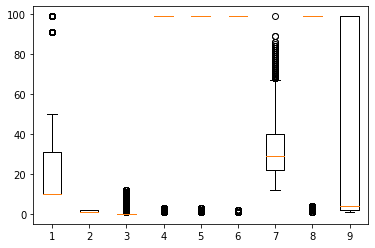

In [113]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x3'],dfs['x4'],dfs['x5'],dfs['x6'],dfs['x7'],dfs['x8'],dfs['x10'],dfs['x11'],dfs['x12']))
plt.show()

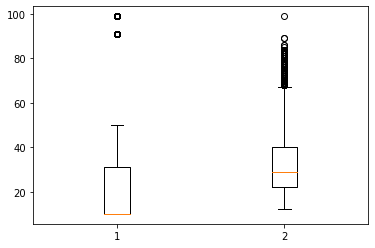

In [114]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x3'],dfs['x10']))
plt.show()

In [115]:
print(dfs['x3'].value_counts()) # 91,99
print(dfs['x10'].value_counts()) # 99.0 年齢と相関あり？

10    37890
35     3758
91     3643
31     2568
33     1149
34     1018
99      692
32      638
50      528
40      373
20      243
Name: x3, dtype: int64
20.0    2958
22.0    2442
21.0    2437
23.0    2224
29.0    2217
24.0    2134
19.0    1995
25.0    1887
26.0    1847
18.0    1835
27.0    1741
28.0    1636
30.0    1419
31.0    1302
32.0    1289
34.0    1256
33.0    1227
35.0    1147
36.0    1142
38.0    1094
37.0    1085
40.0    1040
39.0    1009
41.0    1004
42.0     967
43.0     949
44.0     867
45.0     843
46.0     824
17.0     779
48.0     695
47.0     691
49.0     567
50.0     533
51.0     487
16.0     472
15.0     448
52.0     407
53.0     357
54.0     345
55.0     288
56.0     253
57.0     234
58.0     202
59.0     193
60.0     175
61.0     174
63.0     138
62.0     129
64.0     117
14.0     117
65.0     115
66.0     102
67.0      81
13.0      78
68.0      77
69.0      61
12.0      44
73.0      41
70.0      40
72.0      39
71.0      36
75.0      28
76.0      21
77.0      20


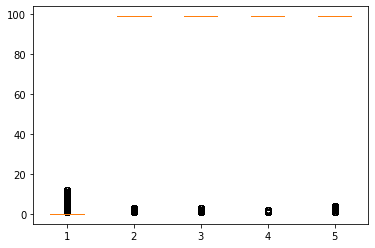

In [116]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x5'],dfs['x6'],dfs['x7'],dfs['x8'],dfs['x11']))
plt.show()

In [117]:
print(dfs['x5'].value_counts()) # 12 少数だが意味はありそう。

0     39389
1      2813
11     1981
2      1507
10     1368
3      1026
9       825
4       794
5       716
8       702
6       692
7       676
12       11
Name: x5, dtype: int64


In [118]:
print(dfs['x6'].value_counts()) # x5の[0]と[99]が同数。同じ意味？その他？
print(dfs['x7'].value_counts())
print(dfs['x8'].value_counts())
print(dfs['x11'].value_counts())
print(dfs['x12'].value_counts())
# ほとんど99、「その他：該当なし」の意味？、つまり基本は「1~4」

99    39389
1      8407
3      3057
2      1647
Name: x6, dtype: int64
99    51053
1      1226
2       198
3        23
Name: x7, dtype: int64
99    48814
1      3648
2        38
Name: x8, dtype: int64
99    46900
3      3918
4      1384
2       234
1        64
Name: x11, dtype: int64
2     24103
99    16214
4     11755
3       262
1       166
Name: x12, dtype: int64


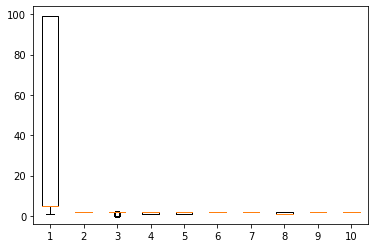

In [119]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x13'],dfs['x14'],dfs['x15'],dfs['x16'],dfs['x17'],dfs['x18'],dfs['x19'],dfs['x20'],dfs['x21'],dfs['x22']))
plt.show()

In [120]:
dfs['x13'].value_counts() # 半分は99、「その他：該当なし」の意味？、つまり基本は「1~4」

5     24405
99    15608
4     12156
1       234
3        49
2        48
Name: x13, dtype: int64

In [121]:
print(dfs['x16'].value_counts()) # そのまま
print(dfs['x17'].value_counts()) # そのまま
print(dfs['x20'].value_counts()) # そのまま

2    35150
1    17350
Name: x16, dtype: int64
2    28748
1    23752
Name: x17, dtype: int64
1    37723
2    14777
Name: x20, dtype: int64


In [122]:
print(dfs['x14'].value_counts()) # 2のみ、一定値、他の値は？　そもそも学習に不要では？
print(dfs['x18'].value_counts()) # 同上
print(dfs['x19'].value_counts()) # 同上
print(dfs['x21'].value_counts()) # 同上
print(dfs['x22'].value_counts()) # 同上

2    52500
Name: x14, dtype: int64
2    52500
Name: x18, dtype: int64
2    52500
Name: x19, dtype: int64
2    52500
Name: x21, dtype: int64
2    52500
Name: x22, dtype: int64


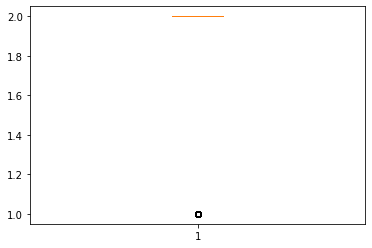

In [123]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x15']))
plt.show()

In [124]:
dfs['x15'].value_counts() # ほとんど2、binary、yと割合が近い？ x15,x24,x25の割合が近い

2    51023
1     1477
Name: x15, dtype: int64

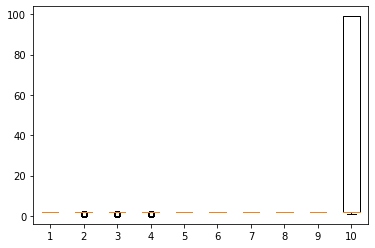

In [125]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x23'],dfs['x24'],dfs['x25'],dfs['x26'],dfs['x27'],dfs['x28'],dfs['x29'],dfs['x30'],dfs['x31'],dfs['x32']))
plt.show()

In [126]:
print(dfs['x23'].value_counts()) # 2のみ、一定値、他の値は？　そもそも学習に不要では？
print(dfs['x27'].value_counts()) # 同上
print(dfs['x28'].value_counts()) # 同上
print(dfs['x29'].value_counts()) # 同上
print(dfs['x30'].value_counts()) # 同上
print(dfs['x31'].value_counts()) # 同上

2    52500
Name: x23, dtype: int64
2    52500
Name: x27, dtype: int64
2    52500
Name: x28, dtype: int64
2    52500
Name: x29, dtype: int64
2    52500
Name: x30, dtype: int64
2    52500
Name: x31, dtype: int64


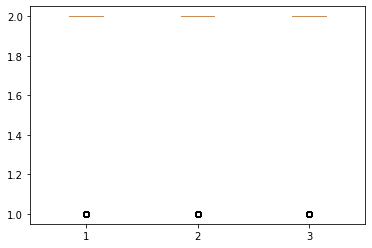

In [127]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x24'],dfs['x25'],dfs['x26']))
plt.show()

In [128]:
print(dfs['x24'].value_counts()) # ほとんど2、binary、yと割合が近い？、x15,x24,x25の割合が近い
print(dfs['x25'].value_counts()) # 同上
print(dfs['x26'].value_counts()) # 同上

2    50930
1     1570
Name: x24, dtype: int64
2    51189
1     1311
Name: x25, dtype: int64
2    52088
1      412
Name: x26, dtype: int64


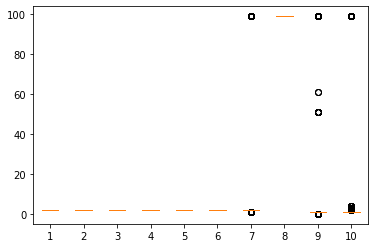

In [129]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x33'],dfs['x34'],dfs['x35'],dfs['x36'],dfs['x37'],dfs['x38'],dfs['x39'],dfs['x40'],dfs['x41'],dfs['x42']))
plt.show()

In [130]:
print(dfs['x33'].value_counts()) # 2のみ、一定値、他の値は？　そもそも学習に不要では？
print(dfs['x34'].value_counts()) # 同上
print(dfs['x35'].value_counts()) # 同上
print(dfs['x36'].value_counts()) # 同上
print(dfs['x37'].value_counts()) # 同上
print(dfs['x38'].value_counts()) # 同上

2    52500
Name: x33, dtype: int64
2    52500
Name: x34, dtype: int64
2    52500
Name: x35, dtype: int64
2    52500
Name: x36, dtype: int64
2    52500
Name: x37, dtype: int64
2    52500
Name: x38, dtype: int64


In [131]:
print(dfs['x40'].value_counts()) # 99のみ、一定値、他の値は？　そもそも学習に不要では？

99    52500
Name: x40, dtype: int64


In [132]:
print(dfs['x39'].value_counts()) # 99意味ありそう
print(dfs['x41'].value_counts()) # 51,61は何を意味している？誤り？　　99意味ありそう
print(dfs['x42'].value_counts()) # 99意味ありそう

2     40757
1     11397
99      346
Name: x39, dtype: int64
1     51125
0       824
99      529
51       19
61        3
Name: x41, dtype: int64
1     43848
3      5011
99     3483
2       149
4         9
Name: x42, dtype: int64


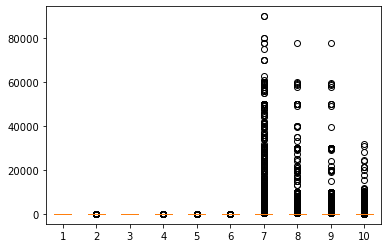

In [133]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x53'],dfs['x54'],dfs['x55'],dfs['x56'],dfs['x57'],dfs['x58'],dfs['x59'],dfs['x60'],dfs['x61'],dfs['x62']))
plt.show()

In [134]:
print(dfs['x53'].value_counts()) # binary
print(dfs['x55'].value_counts()) # 99 その他？

1    35240
2    17260
Name: x53, dtype: int64
99    34761
3      6978
2      5870
5      2705
4      1967
1       219
Name: x55, dtype: int64


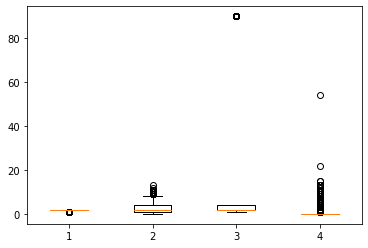

In [135]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x54'],dfs['x56'],dfs['x57'],dfs['x58']))
plt.show()

In [136]:
print(dfs['x54'].value_counts()) # binary、、yと割合が近い？
print(dfs['x56'].value_counts()) # 連続値、割合に差が大きい
print(dfs['x57'].value_counts()) # 90 その他？
print(dfs['x58'].value_counts()) # 54.0　意味はありそう？

2    52048
1      452
Name: x54, dtype: int64
1     16598
3     10386
2      9866
4      8836
5      4443
6      1243
0       640
7       329
8        98
9        40
10       16
11        3
13        1
12        1
Name: x56, dtype: int64
2     27611
4     19654
3      4484
90      399
1       352
Name: x57, dtype: int64
0.0     51732
1.0       387
2.0       136
3.0        78
4.0        54
5.0        28
6.0        21
7.0        18
8.0        13
9.0         9
13.0        8
10.0        5
12.0        4
11.0        3
15.0        2
22.0        1
54.0        1
Name: x58, dtype: int64


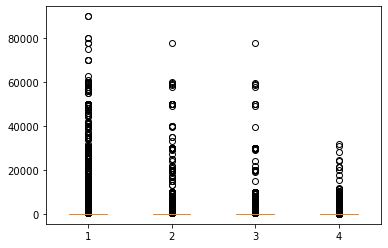

In [137]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x59'],dfs['x60'],dfs['x61'],dfs['x62']))
plt.show()

In [138]:
print(dfs['x59'].value_counts()) # 7600.0だけ多い、その他はまんべんなく
print(dfs['x60'].value_counts()) # 5000.0だけ多い、その他はまんべんなく、最大78000.0
print(dfs['x61'].value_counts()) # 3000.0だけ多い、その他はまんべんなく、最大78000.0
print(dfs['x62'].value_counts()) # [-1]は元欠損値、0が多い、その他はまんべんなく

0.0        51732
5000.0       109
10000.0       87
3000.0        83
1000.0        49
30000.0       33
20000.0       29
4000.0        28
50000.0       19
2000.0        18
8000.0        16
500.0         15
9000.0        12
6000.0        10
15000.0       10
60000.0        9
2500.0         8
7000.0         8
1500.0         7
35000.0        6
2600.0         6
4500.0         6
28000.0        5
48000.0        5
12000.0        5
25000.0        5
9600.0         5
40000.0        5
45000.0        5
6500.0         4
22000.0        4
8500.0         4
11000.0        4
36000.0        4
31000.0        3
24000.0        3
42000.0        3
34000.0        3
3500.0         3
39000.0        3
2400.0         3
70000.0        3
13000.0        3
4600.0         3
27000.0        3
7500.0         3
56000.0        3
29400.0        2
49000.0        2
48400.0        2
90000.0        2
14000.0        2
55000.0        2
59500.0        2
30300.0        2
1400.0         2
4800.0         2
23000.0        2
39600.0       

In [139]:
print(dfs['x59'].describe()) # max:90000.000000
print(dfs['x60'].describe()) # max:78000.000000
print(dfs['x61'].describe()) # max:78000.000000
print(dfs['x62'].describe()) # max:31754.264805

count    52500.00000
mean       213.51221
std       2686.08642
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      90000.00000
Name: x59, dtype: float64
count    52500.000000
mean       116.624762
std       1472.857276
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      78000.000000
Name: x60, dtype: float64
count    52500.000000
mean        76.712210
std       1111.344801
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      78000.000000
Name: x61, dtype: float64
count    52500.000000
mean        19.795427
std        448.495712
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max      31754.264805
Name: x62, dtype: float64


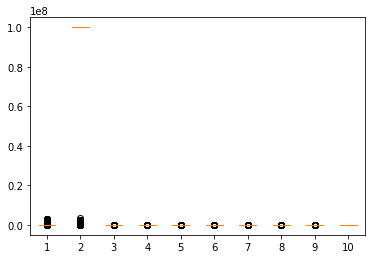

In [140]:
fig, ax = plt.subplots()
ax.boxplot((dfs['x63'],dfs['x64'],dfs['x65'],dfs['x66'],dfs['x67'],dfs['x68'],dfs['x69'],dfs['x70'],dfs['x71'],dfs['x72']))
plt.show()

In [141]:
print(dfs['x63'].value_counts()) # まちまち
print(dfs['x69'].value_counts()) # 10000.0が多い
print(dfs['x70'].value_counts()) # 10000.0が多い

0.0          51732
28680.0          2
1220634.0        1
403743.0         1
117304.0         1
             ...  
17718.0          1
187.0            1
1395670.0        1
6987.0           1
1634570.0        1
Name: x63, Length: 768, dtype: int64
0.0        52274
10000.0       58
3000.0        40
5000.0        36
1000.0        25
20000.0        8
30000.0        8
8000.0         5
50000.0        5
6000.0         3
500.0          3
2000.0         2
29400.0        2
25000.0        2
40000.0        2
4800.0         2
2400.0         1
19100.0        1
58000.0        1
21000.0        1
2600.0         1
5200.0         1
1500.0         1
8300.0         1
33000.0        1
58900.0        1
4600.0         1
4300.0         1
4000.0         1
1600.0         1
49000.0        1
15000.0        1
35000.0        1
19600.0        1
4400.0         1
19700.0        1
39600.0        1
4500.0         1
3800.0         1
24000.0        1
59500.0        1
Name: x69, dtype: int64
0.0        52274
10000.0       58

In [142]:
print(dfs['x64'].value_counts()) # 1094285.0だけ多い、何を意味している？

99999999.0    51732
1572664.0         1
10603.0           1
2456783.0         1
2014574.0         1
              ...  
569438.0          1
514045.0          1
1269559.0         1
634572.0          1
106496.0          1
Name: x64, Length: 769, dtype: int64


In [143]:
print(dfs['x65'].value_counts()) # 4000.0だけ多い
print(dfs['x66'].value_counts()) # 5000.0だけ多い
print(dfs['x67'].value_counts()) # 6600.0だけ多い
print(dfs['x68'].value_counts()) # 1.0だけ多い
print(dfs['x71'].value_counts()) # 6600.0だけ多い
# 何を意味している？

0.0        51732
5000.0       145
1000.0       135
10000.0      131
3000.0       109
500.0         55
2000.0        36
4000.0        26
20000.0       11
30000.0        8
2500.0         7
1500.0         7
6000.0         6
2600.0         5
50000.0        4
9600.0         4
9000.0         4
8000.0         4
4600.0         4
700.0          3
1600.0         3
4800.0         3
17000.0        3
7000.0         3
1400.0         3
900.0          2
2300.0         2
3600.0         2
6400.0         2
29400.0        2
2400.0         2
1200.0         2
5400.0         1
40000.0        1
39600.0        1
1300.0         1
4700.0         1
21600.0        1
58000.0        1
5200.0         1
22000.0        1
3900.0         1
9300.0         1
4500.0         1
59500.0        1
49000.0        1
24000.0        1
7700.0         1
29100.0        1
9500.0         1
3500.0         1
16000.0        1
6900.0         1
3700.0         1
9400.0         1
2800.0         1
59000.0        1
4300.0         1
12500.0       

In [144]:
print(dfs['x72'].value_counts()) # 0のみ、学習に不要では？

0    52500
Name: x72, dtype: int64


In [103]:
# outlier detail
# x0_age：御長寿が少数いる。そのままとする。
# x1_term：長期契約期間が少数いる。そのままとする。
# x2_sex：99は「その他、未入力」、そのままとする。
# x3：離れているが、一定数存在する。そのままとする。
# x10：[99.0]年齢と相関がありそう。そのままとする。
# x5, x6：0,99が同数。意味ありそう。x5の0は99に置換すべき？
# x7,x8,x11,x12 [99]他の値と区別する値。そのままとする。
# x13 99一定数いる。そのまま。
# x39。[99]他の値と区別する値。そのまま。
# x41。51,61少数いるが、意味不明な値、残すべき？
# x42。99 一定数いる。そのまま。
# x55。[99]他の値と区別する値。そのまま。
# x56。[99]他の値と区別する値。そのまま。
# x57。[54]残すべき？

In [104]:
# unsolved
# 本当はどうするべき？　変換・修正すべきデータは？その根拠・基準をどこに求めるべき？

In [105]:
# Check Point!!
# 使える・使えない変数の識別
# 因果関係??
# 擬似相関、別の因果関係、相関がありそうでない

In [106]:
# TODO
# 散布図でデータを可視化
# 帰無仮説・対立仮説を立てる(相関がある・ない)
# 相関性評価
#   相関係数を計算する
#   変数組み合わせ時の説明力を確認する
#   検定表で相関があるかどうかを検定する
# 　　単一AUC
# 　　単体の説明力の評価（Importance）
# 　　相関係数で変数選択（絶対値の大小）
# 　　ランダム・フォレストによる相互作用評価(Importance)
# 　　他と組み合わせると強いものがあるか、弱くなるものがあるか
# 　　相関のある変数は組み合わせて新たな変数をつくれないか
# 特徴量の選択をする
# 新たな変数生成を検討する

In [107]:
# x14,x18,x19,x21,x22,x23,x27,x28,x29,x30,x31,x33,x34,x35,x36,x37,x38,x40,'x49',x72、以外

In [145]:
drop_col = ['x9','x14','x18','x19','x21','x22','x23','x27','x28','x29','x30','x31','x33','x34','x35','x36','x37','x38','x40','x49','x72']
df_spray = df_proc.drop(drop_col, axis=1)
df_spray

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,...,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71
0,1,22.0,0,2,10,1,0,99,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
1,1,49.0,36,2,10,1,8,1,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
2,1,22.0,13,1,10,1,6,1,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
3,1,34.0,24,1,10,2,0,99,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
4,1,26.0,97,1,32,1,10,1,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0,26.0,11,1,10,2,0,99,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
52496,0,32.0,26,2,10,2,0,99,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
52497,0,59.0,84,2,10,2,0,99,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0
52498,0,16.0,8,2,10,2,0,99,99,99,...,-1.0,0.0,99999999.0,0.0,0.0,99.0,0.0,0.0,0.0,-1.0


In [146]:
# これまでの確認結果を踏まえ、以下をまずは散布図で確認する

# similar distribution
# x58, x62, X71
# x59, x68, x67
# x60, x61, x65, x66
# x63, x64 float
# x69, x70

# x5とx6、x10とx0
# x15,x24,x25の割合が近い、x41も？
# x16,x17,x20似ている？
# x53、x55　関係ある？

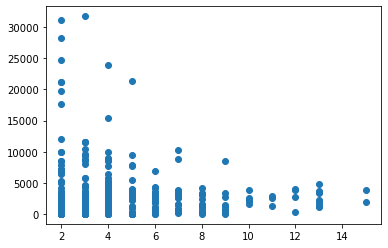

In [173]:
x = df_spray['x58'][df_spray['x58'] != 0][df_spray['x62'] != -1][df_spray['x58'] < 16]
y = df_spray['x62'][df_spray['x58'] != 0][df_spray['x62'] != -1][df_spray['x58'] < 16]
plt.scatter(x, y)

In [162]:
df_spray['x58'].value_counts()

0.0     51732
1.0       387
2.0       136
3.0        78
4.0        54
5.0        28
6.0        21
7.0        18
8.0        13
9.0         9
13.0        8
10.0        5
12.0        4
11.0        3
15.0        2
22.0        1
54.0        1
Name: x58, dtype: int64

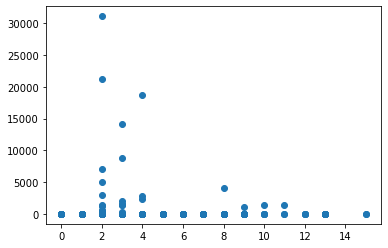

In [172]:
x = df_spray['x58'][df_spray['x58'] < 16]
y = df_spray['x71'][df_spray['x58'] < 16]
plt.scatter(x, y)

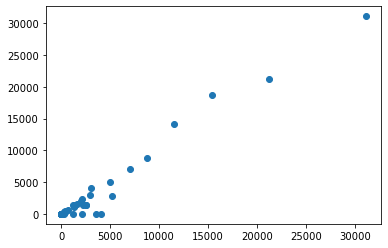

In [175]:
x = df_spray['x62'][df_spray['x62'] != -1][df_spray['x71'] != -1]
y = df_spray['x71'][df_spray['x62'] != -1][df_spray['x71'] != -1]
plt.scatter(x, y)
# 相関ありそう（y=0を除けば）

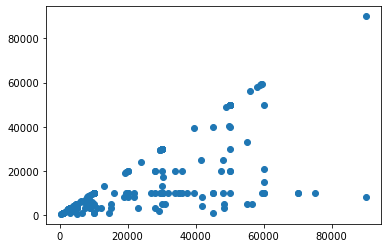

In [177]:
x = df_spray['x59'][df_spray['x59'] != 0][df_spray['x68'] != 0]
y = df_spray['x68'][df_spray['x59'] != 0][df_spray['x68'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、yが同じ値のものが多い）

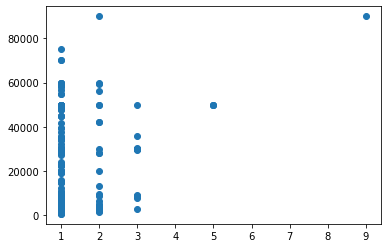

In [157]:
x = df_spray['x67'][df_spray['x67'] < 99]
y = df_spray['x59'][df_spray['x67'] < 99]
plt.scatter(x, y)

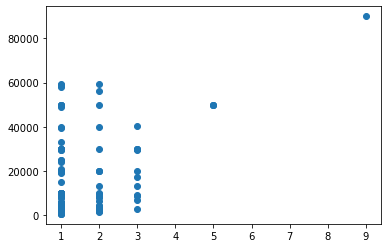

In [155]:
x = df_spray['x67'][df_spray['x67'] < 99]
y = df_spray['x68'][df_spray['x67'] < 99]
plt.scatter(x, y)

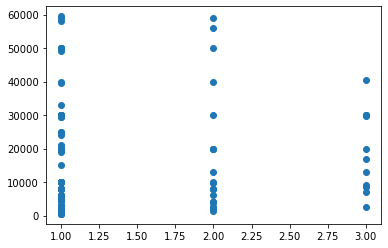

In [181]:
x = df_spray['x67'][df_spray['x67'] < 5][df_spray['x68'] < 80000]
y = df_spray['x68'][df_spray['x67'] < 5][df_spray['x68'] < 80000]
plt.scatter(x, y)

In [154]:
print(df_spray['x67'].value_counts())
# x=9のyは相関がある？外れ値では？

99.0    52274
1.0       186
2.0        24
3.0        12
5.0         3
9.0         1
Name: x67, dtype: int64


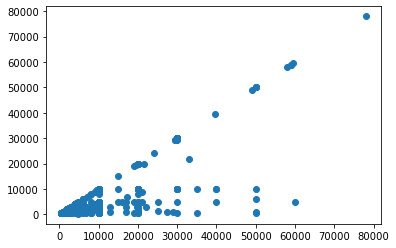

In [183]:
x = df_spray['x60'][df_spray['x60'] != 0][df_spray['x61'] != 0]
y = df_spray['x61'][df_spray['x60'] != 0][df_spray['x61'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

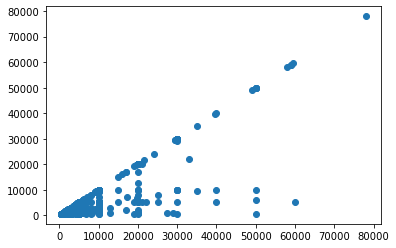

In [185]:
x = df_spray['x60'][df_spray['x60'] != 0][df_spray['x65'] != 0]
y = df_spray['x65'][df_spray['x60'] != 0][df_spray['x65'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

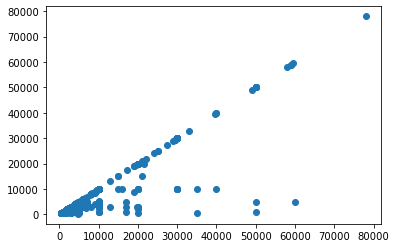

In [187]:
x = df_spray['x60'][df_spray['x60'] != 0][df_spray['x66'] != 0]
y = df_spray['x66'][df_spray['x60'] != 0][df_spray['x66'] != 0]
plt.scatter(x, y)

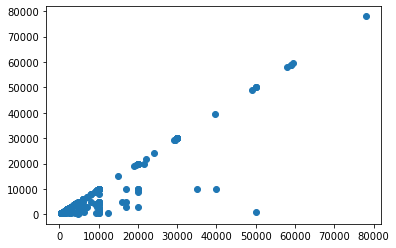

In [189]:
x = df_spray['x65'][df_spray['x65'] != 0][df_spray['x61'] != 0]
y = df_spray['x61'][df_spray['x65'] != 0][df_spray['x61'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

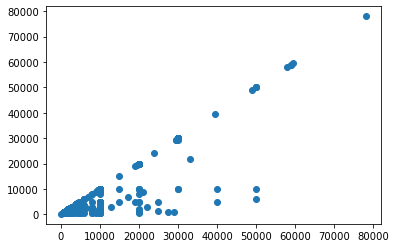

In [191]:
x = df_spray['x66'][df_spray['x66'] != 0][df_spray['x61'] != 0]
y = df_spray['x61'][df_spray['x66'] != 0][df_spray['x61'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

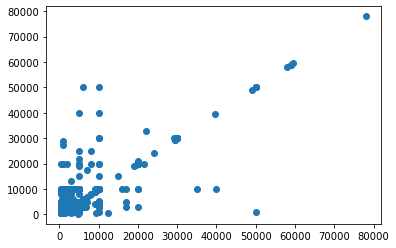

In [193]:
x = df_spray['x65'][df_spray['x65'] != 0][df_spray['x66'] != 0]
y = df_spray['x66'][df_spray['x65'] != 0][df_spray['x66'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

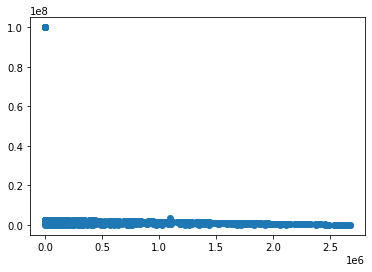

In [195]:
x = df_spray['x63']
y = df_spray['x64']
plt.scatter(x, y)
# 相関ありそう（三角形の下側はばらつきがある）

In [216]:
print(df_spray['x64'].value_counts())

99999999.0    51732
1572664.0         1
10603.0           1
2456783.0         1
2014574.0         1
              ...  
569438.0          1
514045.0          1
1269559.0         1
634572.0          1
106496.0          1
Name: x64, Length: 769, dtype: int64


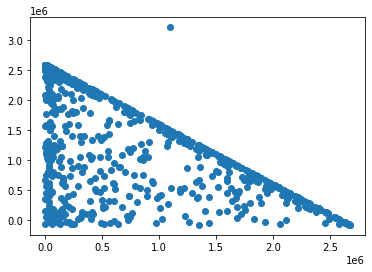

In [213]:
x = df_spray['x63'][df_spray['x64'] < 99999999]
y = df_spray['x64'][df_spray['x64'] < 99999999]
plt.scatter(x, y)
# 相関ありそう（三角形の下側はばらつきがある）

In [214]:
df_spray['x64'][df_spray['x64'] < 99999999.0].max()
# 最大値が外れ値の可能性が高い

3220710.0

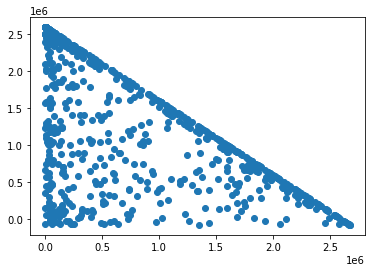

In [215]:
x = df_spray['x63'][df_spray['x64'] < 99999999][df_spray['x64'] < 3220710.0]
y = df_spray['x64'][df_spray['x64'] < 99999999][df_spray['x64'] < 3220710.0]
plt.scatter(x, y)
# 相関ありそう（三角形の下側はばらつきがある）

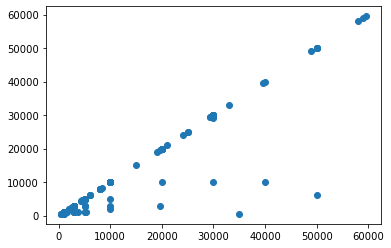

In [218]:
x = df_spray['x69'][df_spray['x69'] != 0][df_spray['x71'] != 0]
y = df_spray['x70'][df_spray['x69'] != 0][df_spray['x71'] != 0]
plt.scatter(x, y)
# 相関ありそう（ばらつきがある、ただしyが低い位置に集まっているものがある）

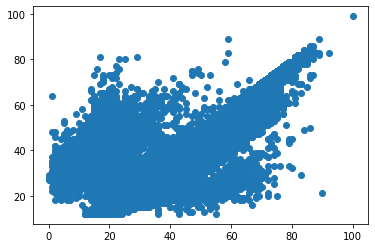

In [219]:
x = df_spray['x0_age']
y = df_spray['x10']
plt.scatter(x, y)
# 相関ありそう（かなりばらつきがある）

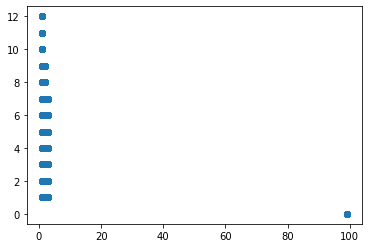

In [220]:
x = df_spray['x6']
y = df_spray['x5']
plt.scatter(x, y)

In [142]:
print(df_spray['x6'].value_counts())
print(df_spray['x5'].value_counts())
# x=99の場合、y=0

99    39389
1      8407
3      3057
2      1647
Name: x6, dtype: int64
0     39389
1      2813
11     1981
2      1507
10     1368
3      1026
9       825
4       794
5       716
8       702
6       692
7       676
12       11
Name: x5, dtype: int64


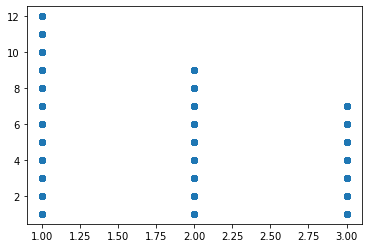

In [143]:
x = df_spray['x6'][df_spray['x6'] < 4]
y = df_spray['x5'][df_spray['x6'] < 4]
plt.scatter(x, y)
# x=2,3の場合、Y=8~12がない。関係はしていそう

In [154]:
# x = df_spray['x15']
# y = df_spray['x24']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [136]:
# x = df_spray['x15']
# y = df_spray['x25']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [152]:
# x = df_spray['x15'][df_spray['x41'] < 2]
# y = df_spray['x41'][df_spray['x41'] < 2]
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [137]:
# x = df_spray['x24']
# y = df_spray['x25']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [148]:
# df_spray['x41'].value_counts()

In [147]:
# x = df_spray['x24'][df_spray['x41'] < 2]
# y = df_spray['x41'][df_spray['x41'] < 2]
# plt.scatter(x, y)
# 51,61は不要ではないか
# binaryのデータでは、相関を散布図で読み取れない

In [149]:
# x = df_spray['x25'][df_spray['x41'] < 2]
# y = df_spray['x41'][df_spray['x41'] < 2]
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [138]:
# x = df_spray['x16']
# y = df_spray['x17']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [139]:
# x = df_spray['x16']
# y = df_spray['x20']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [140]:
# x = df_spray['x17']
# y = df_spray['x20']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [141]:
# x = df_spray['x53']
# y = df_spray['x55']
# plt.scatter(x, y)
# binaryのデータでは、相関を散布図で読み取れない

In [ ]:
# 帰無仮説（下記を相関ありと過程する）
# x0_age,x10
# x5,x6
# x59,x67
# x59,x68
# x60,x61
# x60,x65
# x60,x66
# x61,x65
# x61,x66
# x65,x66
# x62,x71
# x63,x64
# x69,x70

In [459]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='kendall') # pearson, kendall, spearman
corr_matrix

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71
y,1.000000,-0.034157,-0.137548,-0.037202,0.096381,-0.071414,0.136083,-0.145400,0.015766,0.004765,-0.007430,0.015847,0.007772,0.044782,0.015867,0.008022,0.000009,0.028109,0.007752,0.028333,0.009750,-0.016897,0.055599,0.069840,0.143155,0.144601,0.167800,0.018908,NaN,NaN,NaN,NaN,NaN,-0.007823,-0.004361,-0.001429,-0.032417,-0.105914,-0.105528,0.069304,0.069218,0.069253,0.069346,0.037707,0.069340,-0.069166,0.069363,0.069252,-0.046725,0.046715,0.046707,0.046697,0.039202
x0_age,-0.034157,1.000000,0.130631,-0.013167,-0.051030,-0.046796,-0.047931,0.052191,0.004048,0.010581,0.507750,0.010227,0.002579,0.012668,0.012861,-0.047327,-0.003103,-0.044394,-0.019460,-0.021887,-0.021715,0.041355,0.005113,-0.047591,0.051695,0.037426,0.058986,0.034370,NaN,NaN,NaN,NaN,NaN,-0.210039,-0.047881,0.008422,-0.108786,0.044525,0.029985,0.007304,0.007387,0.007397,0.007424,0.003654,0.007240,-0.007289,0.007404,0.007438,-0.007737,0.007724,0.007728,0.007737,-0.001910
x1_term,-0.137548,0.130631,1.000000,-0.031040,0.092547,-0.392056,0.040520,-0.028111,-0.141886,-0.076347,-0.152397,-0.207827,-0.193580,-0.238138,-0.026792,0.075439,-0.169300,-0.123364,-0.079320,-0.061394,-0.035689,-0.070989,-0.158450,-0.121419,-0.341493,-0.349194,-0.280020,0.373503,NaN,NaN,NaN,NaN,NaN,0.048766,0.082436,-0.021591,0.121390,0.671357,-0.026823,-0.016849,-0.016758,-0.016756,-0.016748,-0.012384,-0.016857,0.016807,-0.016763,-0.016740,0.008118,-0.008113,-0.008111,-0.008105,-0.007937
x2_sex,-0.037202,-0.013167,-0.031040,1.000000,0.087349,0.045601,-0.047824,0.047838,-0.013756,-0.019343,0.000078,0.002191,0.007175,-0.001770,-0.035871,0.019306,0.065039,0.019877,0.012845,0.006295,0.009256,-0.009869,-0.005986,0.015469,-0.007272,-0.010115,0.003353,-0.005782,NaN,NaN,NaN,NaN,NaN,0.076076,0.019447,-0.007944,0.036474,-0.033181,0.063269,-0.049188,-0.049187,-0.049185,-0.049181,-0.037140,-0.049082,0.049111,-0.049188,-0.049167,0.026471,-0.026452,-0.026451,-0.026451,-0.012118
x3,0.096381,-0.051030,0.092547,0.087349,1.000000,-0.179202,0.053515,-0.053456,0.000187,-0.010463,-0.164372,0.002219,-0.006672,-0.030465,0.000077,0.009153,-0.038294,-0.006394,-0.017185,0.010815,0.006312,-0.003709,-0.021512,0.029556,0.003336,-0.000486,0.030826,0.086894,NaN,NaN,NaN,NaN,NaN,-0.004931,0.038200,-0.005715,0.014178,0.070295,-0.019795,0.003467,0.003448,0.003465,0.003505,-0.001682,0.003576,-0.003545,0.003479,0.003501,-0.002605,0.002584,0.002587,0.002593,-0.006064
x4,-0.071414,-0.046796,-0.392056,0.045601,-0.179202,1.000000,-0.088220,0.083521,0.110070,0.022653,0.115969,0.259612,0.090833,0.137899,-0.022637,-0.033840,0.130987,0.096356,0.035927,0.020602,0.014573,0.045514,0.076806,0.020054,0.140450,0.170069,0.010847,-0.271389,NaN,NaN,NaN,NaN,NaN,0.063189,-0.069219,0.010483,-0.089906,-0.367332,0.101840,-0.000350,-0.000328,-0.000336,-0.000398,0.004170,-0.000443,0.000412,-0.000362,-0.000384,0.001829,-0.001819,-0.001818,-0.001821,-0.002392
x5,0.136083,-0.047931,0.040520,-0.047824,0.053515,-0.088220,1.000000,-0.947431,0.011012,0.006583,-0.073287,0.027089,-0.106357,-0.015268,0.005167,0.104162,-0.100617,-0.068405,0.001712,0.024319,-0.016785,-0.100653,0.056970,-0.024853,-0.080756,-0.079529,-0.098765,0.009414,NaN,NaN,NaN,NaN,NaN,0.018121,-0.022219,-0.005824,0.067135,0.089640,-0.329619,0.080533,0.080308,0.080490,0.080815,0.020898,0.081017,-0.080685,0.080721,0.080615,-0.048182,0.048023,0.048030,0.048043,0.007871
x6,-0.145400,0.052191,-0.028111,0.047838,-0.053456,0.083521,-0.947431,1.000000,-0.010069,-0.007840,0.073469,-0.026826,0.103996,0.011532,-0.004697,-0.104118,0.098204,0.067056,-0.002470,-0.024863,0.016162,0.100674,-0.059440,0.022319,0.077316,0.076159,0.097842,0.000769,NaN,NaN,NaN,NaN,NaN,-0.018214,0.022428,0.006234,-0.065218,-0.079104,0.340171,-0.084133,-0.083917,-0.084093,-0.084402,-0.023264,-0.084575,0.084251,-0.084322,-0.0842

In [460]:
# 目的変数に対する変数単体の相関係数
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='kendall')
# pearson：積率相関係数、パラメトリック、正規分布
# kendall, spearman：順位相関係数、ノンパラメトリック、非正規分布
corr_matrix['y'][corr_matrix['y'].abs() > 0.1]

y          1.000000
x1_term   -0.137548
x5         0.136083
x6        -0.145400
x42        0.143155
x43        0.144601
x44        0.167800
x56       -0.105914
x57       -0.105528
Name: y, dtype: float64

In [461]:
# 目的変数に対する変数単体の相関係数
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='spearman')
corr_matrix['y'][corr_matrix['y'].abs() > 0.1]

y          1.000000
x1_term   -0.167816
x3         0.102011
x5         0.143785
x6        -0.150053
x42        0.146073
x43        0.147110
x44        0.167800
x56       -0.118328
x57       -0.109556
Name: y, dtype: float64

In [462]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='kendall') # pearson, kendall, spearman
corr_matrix[:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0_age,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1_term,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2_sex,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.947431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,-0.947431,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [463]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='spearman') # pearson, kendall, spearman
corr_matrix[:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0_age,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1_term,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2_sex,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.990707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,-0.990707,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
# 相関行列
pd.set_option('display.max_columns', 100)
corr_matrix = df_spray.corr(method='spearman') # pearson, kendall, spearman
corr_matrix[:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x15,x16,x17,x20,x24,x25,x26,x32,x39,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0_age,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1_term,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2_sex,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x5,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.990707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x6,NaN,NaN,NaN,NaN,NaN,NaN,-0.990707,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
corr = df_spray.corr().abs() # 絶対値で並び替え
st = corr.unstack()
st_sort = st.sort_values(kind="quicksort", ascending=False)
pd.set_option('display.max_rows', 500)
print(st_sort.shape)
print(st_sort[47:247])

(2809,)
y        y          1.000000
x43      x45        0.998910
x45      x43        0.998910
x44      x42        0.976640
x42      x44        0.976640
x12      x13        0.965232
x13      x12        0.965232
x32      x16        0.965146
x16      x32        0.965146
x61      x65        0.955743
x65      x61        0.955743
x69      x70        0.954090
x70      x69        0.954090
x66      x60        0.927017
x60      x66        0.927017
x69      x68        0.911793
x68      x69        0.911793
x43      x42        0.908090
x42      x43        0.908090
x61      x66        0.905920
x66      x61        0.905920
x45      x42        0.905156
x42      x45        0.905156
x44      x43        0.886663
x43      x44        0.886663
x45      x44        0.883927
x44      x45        0.883927
x65      x60        0.878183
x60      x65        0.878183
x65      x66        0.875893
x66      x65        0.875893
x70      x68        0.856846
x68      x70        0.856846
x61      x60        0.837955
x60   

In [ ]:
# 帰無仮説（下記を相関ありと過程する）
# x0_age,x10
# x5,x6
# x59,x67
# x59,x68
# x60,x61
# x60,x65
# x60,x66
# x61,x65
# x61,x66
# x62,x71
# x63,x64
# x65,x66
# x69,x70

In [ ]:
# 相関係数
# x0_age   x10        0.654448
# x5       x6         0.790922
# x59      x67        0.499071
# x59      x68        0.577026
# x60      x61        0.837955
# x60      x65        0.878183
# x60      x66        0.927017
# x61      x65        0.955743
# x61      x66        0.905920
# x62      x71        0.434522
# x63      x64        0.707551
# x65      x66        0.875893
# x69      x70        0.954090

In [227]:
# strong correlation
# x0_age ⇆ x10, x56
# x5 ⇆ x6
# x12 ⇆ x13：NaN
# x16 ⇆ x32：0.956657, x39：-0.702893 ←相関なし
# x42 ⇆ x43：-0.949907, x44：-0.676321 ←相関あり
# x43 ⇆ x44：-0.562745 ←相関なし
# x58 ⇆ x59 ←微妙
# x59 ⇆ x58, x60, x66, x68, x69, x70
# x60 ⇆ x59, x61, x62, x65, x66, 
# x61 ⇆ x61, x65, x68, x69, x70
# x62 ⇆ x60, x66, x69, x71, x68, x69, x70, x71
# x63 ⇆ x64
# x64 ⇆ x63
# x65 ⇆ x60, x61, x65, x66, x68, x69, x70
# x66 ⇆ x59, x60, x61, x62, x65, x66, x68, x69, x70
# x68 ⇆ x59, x60, x61, x65, x66, x68, x69, x70
# x69 ⇆ x59, x60, x61, x62, x65, x66, x68, x69, x70, x71
# x70 ⇆ x59, x60, x61, x65, x66, x68, x69, x70
# x71 ⇆ , x60, x62, x66, x69, x71

In [228]:
# 相関係数
# x0_age,x10：-0.609904
# x5,x6：0.990707
# x59,x67：-0.807815
# x59,x68：-0.786478
# x60,x61：-0.644961
# x60,x65：-0.731051
# x60,x66：-0.882849
# x61,x65：-0.914880
# x61,x66：-0.763164
# x62,x71：-0.810233
# x63,x64：0.614577
# x65,x66：-0.721186
# x69,x70：-0.924053

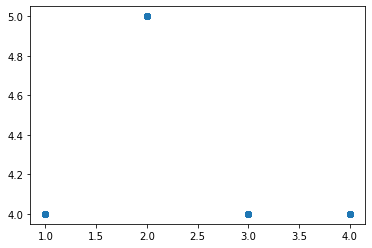

In [229]:
x = df_spray['x12'][df_spray['x13'] < 99][df_spray['x12'] < 99]
y = df_spray['x13'][df_spray['x13'] < 99][df_spray['x12'] < 99]
plt.scatter(x, y)
# 値が固定値で連動している。因果関係がありそう（例：x=1の時、y=4）

In [230]:
print(df_spray['x12'].value_counts())
print(df_spray['x13'].value_counts())

2     24103
99    16214
4     11755
3       262
1       166
Name: x12, dtype: int64
5     24405
99    15608
4     12156
1       234
3        49
2        48
Name: x13, dtype: int64


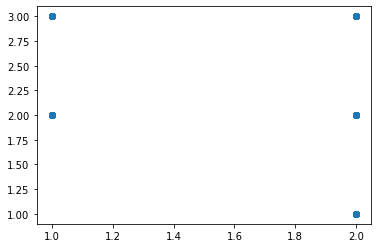

In [231]:
x = df_spray['x16'][df_spray['x16'] < 99][df_spray['x32'] < 99]
y = df_spray['x32'][df_spray['x16'] < 99][df_spray['x32'] < 99]
plt.scatter(x, y)
# 相関はないのでは。

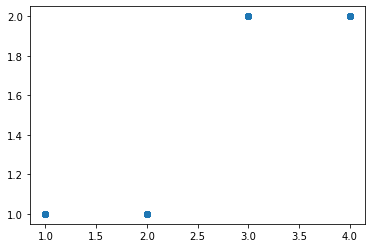

In [232]:
x = df_spray['x42'][df_spray['x43']<99][df_spray['x42']<99]
y = df_spray['x43'][df_spray['x43']<99][df_spray['x42']<99]
plt.scatter(x, y)
# 値が連動している。

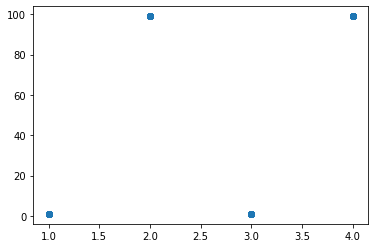

In [233]:
x = df_spray['x42'][df_spray['x42']<99]
y = df_spray['x44'][df_spray['x42']<99]
plt.scatter(x, y)
# 値が連動している

In [ ]:
# 特徴量生成、最適化
# 単一：対数・2乗・標準化・ロジット変数・差分
# 組み合わせ：積・差・和・比・主成分・距離

In [ ]:
# 検討対象
# x0_age,x10
# x5,x6
# x59,x67
# x59,x68
# x60,x61
# x60,x65
# x60,x66
# x61,x65
# x61,x66
# x62,x71
# x63,x64
# x65,x66
# x69,x70

In [524]:
print(df_spray['x0_age'].head())
print(df_spray['x10'].head())
# 年齢に関係する相関。組み合わせでなく、他項目と相関の高い方を特徴量から除外する

0    22.0
1    49.0
2    22.0
3    34.0
4    26.0
Name: x0_age, dtype: float64
0    22.0
1    46.0
2    21.0
3    32.0
4    18.0
Name: x10, dtype: float64


In [527]:
print(df_spray['x5'].value_counts())
print(df_spray['x6'].value_counts())

0     39389
1      2813
11     1981
2      1507
10     1368
3      1026
9       825
4       794
5       716
8       702
6       692
7       676
12       11
Name: x5, dtype: int64
99    39389
1      8407
3      3057
2      1647
Name: x6, dtype: int64


In [234]:
# 特徴量選択
# ランダム・フォレストによる、相互相関性の評価
# 組み合わせて説明力がどう変わるか

In [465]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_label = df_spray.copy()
df_label['x9'] = le.fit_transform(df_proc2['x9'].values)
# df_proc2

In [466]:
# ランダム・フォレストによる相互作用評価
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df_label.drop(columns='y')
y = df_label['y']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

classifier_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_model.fit(train_X, train_y)

pred_y = classifier_model.predict(test_X)
cm = confusion_matrix(test_y, pred_y)
print(cm)
print(accuracy_score(test_y, pred_y))

# Importtance
# 組み込み法（モデルベース特徴量選択：モデルが学習するタイミングで特徴量を評価する）
importance = classifier_model.feature_importances_
importances = pd.DataFrame(importance, index = X.columns, columns=['importance'])
pd.set_option('display.max_rows', 80)
importances.sort_values(by='importance', ascending=False)

[[14933    57]
 [  618   142]]
0.9571428571428572


,importance
x1_term,0.156788
x0_age,0.101658
x10,0.099264
x5,0.061907
x3,0.058900
x6,0.051641
x57,0.050601
x9,0.047653
x4,0.040381
x56,0.035844


In [520]:
importances[importances['importance']>0.01]

,importance
x0_age,0.101658
x1_term,0.156788
x2_sex,0.026865
x3,0.058900
x4,0.040381
x5,0.061907
x6,0.051641
x10,0.099264
x11,0.011084
x12,0.015268


In [521]:
# ラッパー法（反復特徴量選択：機械学習のモデルを用いて特徴量を評価する）
# recursive feature elimination：RFE

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

selector = RFE(RandomForestRegressor(n_estimators=10, random_state=0), n_features_to_select=22)
# n_estimators：バギングに用いる決定木の個数、n_features_to_select：最終的に選択したい特徴量の次元
selector.fit(X, y)
support = selector.get_support()
print(X.columns)
print('='*50)
print(support) # 削減結果

Index(['x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x15', 'x16', 'x17', 'x20', 'x24', 'x25',
       'x26', 'x32', 'x39', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47',
       'x48', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58',
       'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68',
       'x69', 'x70', 'x71', 'x9'],
      dtype='object')
[ True  True  True  True  True  True  True False False  True  True  True
  True False False  True  True False False False  True False False False
  True False False False False False False False  True  True False  True
  True  True False  True False False False False False False False False
 False False False False  True]


In [522]:
array = []
i = 0
for col in X.columns:
    if support[i] == True:
        array.append('{0} : {1}'.format(col, support[i]))
    i = i+1
array

# x0_age	0.101658
# x1_term	0.156788
# x2_sex	0.026865
# x3	0.058900
# x4	0.040381
# x5	0.061907
# x6	0.051641
# x10	0.099264
# x11	0.011084 ←異
# x12	0.015268
# x13	0.015680
# x17	0.019779
# x20	0.017260
# x42	0.013098 ←異
# x43	0.023452
# x45	0.019030 ←異
# x52	0.016640
# x53	0.015018
# x55	0.025299
# x56	0.035844
# x57	0.050601
# x9	0.047653

# x59 ←異

['x0_age : True',
 'x1_term : True',
 'x2_sex : True',
 'x3 : True',
 'x4 : True',
 'x5 : True',
 'x6 : True',
 'x10 : True',
 'x11 : True',
 'x12 : True',
 'x13 : True',
 'x17 : True',
 'x20 : True',
 'x32 : True',
 'x43 : True',
 'x52 : True',
 'x53 : True',
 'x55 : True',
 'x56 : True',
 'x57 : True',
 'x59 : True',
 'x9 : True']

In [494]:
#次元削除後のカラム数
print(selector.n_features_)
print('='*50)
#次元削除後のランキング
print(selector.ranking_)

20
[ 1  1  1  1  1  1  1 13  8  1  2  1  1 16 11  1  1 15 23 27  3 10  7  4
  1 19  5 31 30 32 34 33  1  1 20  1  1  1 17  1 18  9 25  6 12 14 22 29
 26 28 24 21  1]


In [ ]:
# 変数単体でのAUC
# x1_term : 0.7258950794142892
# x6 : 0.6615857035949022
# x3 0.6560254281932084
# x5 : 0.6558202078662744
# x0_age : 0.5986913518161799
# x4 : 0.5793724481948183
# x12 0.5720290472437117
# x2_sex : 0.5711118319281385
# x10 : 0.5555445750504683
# x7 : 0.5025797988282915
# x8 : 0.49984190065104656

In [ ]:
# 相関係数
# x0_age   x10     0.654448
# x5       　　x6     　 　　　0.790922
# x59      x67        0.499071
# x59      x68        0.577026
# x60      x61        0.837955
# x60      x65        0.878183
# x60      x66        0.927017
# x61      x65        0.955743
# x61      x66        0.905920
# x62      x71        0.434522
# x63      x64        0.707551
# x65      x66        0.875893
# x69      x70        0.954090

In [ ]:
# 相関のある変数は組み合わせて新たな変数をつくれないか

In [ ]:
# 特徴量選択
# x14,x18,x19,x21,x22,x23,x27,x28,x29,x30,x31,x33,x34,x35,x36,x37,x38,x40,x72
# 一定値（2のみ、99のみなど）特徴量としては不要とする

In [ ]:
# 債権回収のドメイン知識はどのように関係する？

In [ ]:
# 連続値特徴量(Label)、カテゴリカル特徴量(One hot)

In [ ]:
# 相関のある変数をどちらか削除する場合、そのどちらを、どういう理由で、削除すべきか←両者の、その他の変数との相関係数も確認する
# 削除ではなく、変換すべきパターンなどは存在するのか？

In [ ]:
# 特徴量の選択（Filter法、Wrapper法、Embedded法）
# 特徴量の組み合わせを見つけ出す、Wrapper Method？
# もっとアナログな方法はないか

In [ ]:
# 保留事項
# df[["y", "x0_age"]].corr()
# df[["y", "x1_term"]].corr()
# df[["y", "x2_sex"]].corr()
# df[["x0_age", "x1_term"]].corr()
# df[["x0_age", "x2_sex"]].corr()
# df[["x1_term", "x2_sex"]].corr()
# plt.scatter(x="x0_age", y="x1_term", data=df)
# sns.stripplot(x="x2_sex", y="x1_term", data=df)
# sns.boxplot(x="x2_sex", y="x1_term", data=df)
# # linear regression
# sns.regplot(x="x2_sex", y="x1_term", data=df)

In [44]:
# sns.set_context("talk")
# fig = plt.subplots(figsize=(100, 100))
# sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='Blues', square=True)

In [45]:
# all distribution
# sns.pairplot(data_corr)

In [319]:
df_light = df_label.copy()

In [429]:
# Data divide
df_X = df_light.drop(columns='y') # all variable
# df_X = df_light.iloc[:, 12:13] #  only
df_y = df_light['y']

In [430]:
# 内部のハイパーパラメータの動きはどうなっている？
# バリエーションデータ作成目的を説明できる？
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [431]:
# Create dataset
lgb_train = lgb.Dataset(X_train_val, y_train_val)
lgb_val = lgb.Dataset(X_val, y_val)

In [432]:
# 説明できる？
param = {'metric': 'auc', 'objective': 'binary'}

In [433]:
# modeling
model_lgb = lgb.train(param, lgb_train, valid_sets=lgb_val)

[LightGBM] [Info] Number of positive: 1601, number of negative: 31999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 33600, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047649 -> initscore=-2.995076
[LightGBM] [Info] Start training from score -2.995076
[1]	valid_0's auc: 0.843009
[2]	valid_0's auc: 0.847611
[3]	valid_0's auc: 0.857855
[4]	valid_0's auc: 0.862612
[5]	valid_0's auc: 0.863929
[6]	valid_0's auc: 0.86564
[7]	valid_0's auc: 0.869747
[8]	valid_0's auc: 0.870596
[9]	valid_0's auc: 0.870735
[10]	valid_0's auc: 0.870917
[11]	valid_0's auc: 0.870833
[12]	valid_0's auc: 0.872334
[13]	valid_0's auc: 0.873476
[14]	valid_0's auc: 0.873757
[15]	valid_0's auc: 0.878291
[16]	valid_0's 

In [434]:
preds = model_lgb.predict(X_test)
preds

array([0.00554508, 0.00948898, 0.00091171, ..., 0.00608348, 0.00251814,
       0.01320377])

In [435]:
# extraction of true,false positive ratio
fpr, tpr, thresholds = metrics.roc_curve(y_test, prebs)
auc = metrics.auc(fpr, tpr)
auc
# 変数単体でのAUC
# x1_term : 0.7258950794142892
# x6 : 0.6615857035949022
# x3 0.6560254281932084
# x5 : 0.6558202078662744
# x0_age : 0.5986913518161799
# x4 : 0.5793724481948183
# x12 0.5720290472437117
# x2_sex : 0.5711118319281385
# x10 : 0.5555445750504683
# x7 : 0.5025797988282915
# x8 : 0.49984190065104656

0.8885403574738853

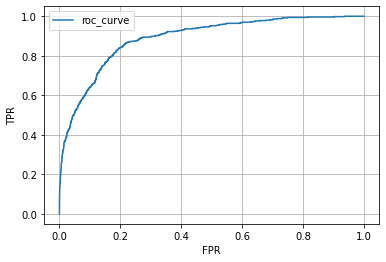

In [436]:
plt.plot(fpr, tpr, label='roc_curve')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [439]:
# extraction of importance
pd.set_option('display.max_rows', 80)
importance = pd.DataFrame(model_lgb.feature_importance(), index = df_X.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False)

,Importance
x1_term,483
x0_age,378
x10,363
x5,179
x9,150
x56,134
x57,125
x3,120
x55,113
x4,69


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

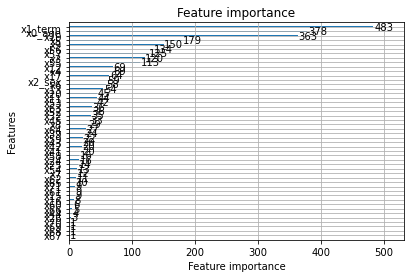

In [440]:
lgb.plot_importance(model_lgb)

In [441]:
y_pred = np.where(preds < 0.5, 0, 1) # 閾値=0.5
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [442]:
accuracy_score(y_test, y_pred)

0.9577142857142857

In [443]:
recall_score(y_test, y_pred)

0.1952191235059761

In [444]:
precision_score(y_test, y_pred)

0.7101449275362319

In [445]:
f1_score(y_test, y_pred)

0.30624999999999997

In [446]:
log_loss(y_test, y_pred)

1.460499876498815